In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from datetime import date
plt.rc('font',family='Malgun Gothic')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#from pycaret.utils import enable_colab
#enable_colab()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# 파일을 읽어오는 경로임 밑을 설명해보자면, 나의 구글 드라이브 -> 동일건축-> Final_data(D).xlsx 파일임을 뜻함
df = pd.read_excel("/content/drive/MyDrive/동일건축 /Final_data(D).xlsx")
df

,NO,BidID,DongilCategoryCode,G2BNumTxt,ActCode,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,CostRatioType,BidLimitRatio,HouseHold,GroundArea,SuccessCorpID,AverageCost,AboveCount,DrawedCount,Sno,BidRank,CorpID,RegistNum,CorpName,WantCost,CostRatio,SelectedNum,BiddingDateTime,BaseRatio,CorpRatio,CorpConversionRatio,CorpConversionRatio100,WantCostScore,PQScore,TotalScore,IsDetermine,C/P,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum
0,0,BID2012060003,HousingCat,20120632471,HousingAct,2012-07-10 09:00:00,2012-07-11 10:00:00,2012-07-11 11:00:00,52880351000,1224152242,1,-3% ~ +3%,0.8045,637,32761.0,COR0000203,1221367350,7,86,2446,1,COR0000203,1148164961,주식회사 혜원까치종합건축사사무소,982663800,0.804560,11 08,2012-07-10,0.802730,99.779995,NaN,NaN,NaN,NaN,NaN,1,0.997725,대구광역시,25.9,6.5,2.5,67.4
1,85,BID2012060004,HousingCat,20120632367,HousingAct,2012-06-29 16:00:00,2012-07-09 10:00:00,2012-07-09 11:00:00,33870622000,910811790,1,-3% ~ +3%,0.8295,319,17115.0,COR0000259,923408375,7,96,2532,1,COR0000259,2118170269,(주)종합건축사사무소 가전,766153000,0.829701,04 09,2012-07-06,0.841176,101.407593,NaN,NaN,NaN,NaN,NaN,1,1.013830,충청북도,20.9,102.5,3.2,88.8
2,181,BID2012060005,HousingCat,20120629711,HousingAct,2012-07-05 09:00:00,2012-07-05 18:00:00,2012-07-06 09:00:00,231773056000,5128141104,1,-3% ~ +3%,0.7295,1967,112801.0,COR0000074,5101526100,7,65,2628,1,COR0000074,1188112617,주식회사 영화키스톤건축사사무소,3723116000,0.729804,01 04,2012-07-05,0.726017,99.522506,NaN,NaN,NaN,NaN,NaN,1,0.994810,경기도 화성시,22.7,72.0,2.1,89.6
3,269,BID2012060007,HousingCat,20120626457,HousingAct,2012-07-03 09:00:00,2012-07-04 10:00:00,2012-07-04 11:00:00,116602943000,2629687871,1,-3% ~ +3%,0.7295,1310,64263.0,COR0000209,2647037275,7,62,2715,1,COR0000209,1088140227,주식회사 빅스코이엔씨,1931546008,0.729701,10 05,2012-07-03,0.734515,100.687500,NaN,NaN,NaN,NaN,NaN,1,1.006598,경상남도,22.7,25.0,1.5,78.1
4,336,BID2012060008,HousingCat,20120626429,HousingAct,2012-07-02 10:30:00,2012-07-03 10:00:00,2012-07-03 11:00:00,50958014000,1180791391,1,-3% ~ +3%,0.8295,478,22053.0,COR0000222,1168449200,7,96,2777,1,COR0000222,2068148256,(주)엄앤드이종합건축사사무소,993720000,0.850461,13 06,2012-07-02,0.841571,101.455236,NaN,NaN,NaN,NaN,NaN,1,0.989548,경상남도,24.0,0.0,2.5,62.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762,233835,BID2021070049,HousingCat,20210709335,HousingAct,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,101147256000,2285734794,0,-3% ~ +3%,0.8045,919,39184.4,COR0000244,2287877725,7,86,544921,1,COR0000244,1228161010,주식회사승우엔지니어링,1841197000,0.804762,09 03,2021-07-16,0.805516,100.126347,0.03256,100.03256,25.0,60.0,85.0,1,0.992055,충청북도,28.8,0.0,2.2,68.4
2763,233979,BID2021070053,HousingCat,20210708492,HousingAct,2021-07-16 09:00:00,2021-07-20 12:00:00,2021-07-20 14:00:00,180757772000,4042699980,0,-3% ~ +3%,0.7295,1202,57699000.0,COR0000185,4054494600,7,67,545982,1,COR0000185,2158108826,주식회사 이가에이씨엠건축사사무소,2958137700,0.729595,09 14,2021-07-19,0.731723,1.003048,NaN,NaN,NaN,NaN,NaN,1,1.002918,충청남도,26.4,67.4,1.9,80.1
2764,234046,BID2021070054,HousingCat,20210708492,HousingAct,2021-07-16 09:00:00,2021-07-20 12:00:00,2021-07-20 14:00:00,180757772000,4042699980,0,-3% ~ +3%,0.7295,1202,57699000.0,COR0000185,4054494600,7,67,546049,1,COR0000185,2158108826,주식회사 이가에이씨엠건축사사무소,2958137700,0.729595,09 14,2021-07-19,0.731723,100.304768,NaN,NaN,NaN,NaN,NaN,1,1.002918,충청남도,26.4,67.4,1.9,80.1
2765,234122,BID2021070057,HousingCat,20210712781,HousingAct,2021-07-21 10:00:00,2021-07-23 10:00:00,2021-07-23 14:00:00,123375000000,2780006253,0,-3% ~ +3%,0.8045,810,41730.7,COR0000001,2769894050,7,88,547270,1,COR0000001,1058132709,주식회사 종합건축사사무소동일건축,2229146000,0.804777,10 14,2021-07-23,0.801849,99.670513,NaN,NaN,NaN,NaN,NaN,1,0.996363,경상남도,31.2,0.0,1.8,61.8


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2767 entries, 0 to 2766
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   NO                      2767 non-null   int64         
 1   BidID                   2767 non-null   object        
 2   DongilCategoryCode      2767 non-null   object        
 3   G2BNumTxt               2767 non-null   int64         
 4   ActCode                 2767 non-null   object        
 5   BidStartDateTime        2767 non-null   datetime64[ns]
 6   BidEndDateTime          2767 non-null   datetime64[ns]
 7   BidOpenDateTime         2767 non-null   datetime64[ns]
 8   SupervisionConstCost    2767 non-null   int64         
 9   BaseCost                2767 non-null   int64         
 10  IsVAT                   2767 non-null   int64         
 11  CostRatioType           2767 non-null   object        
 12  BidLimitRatio           2767 non-null   float64 

# 데이터 분포확인 그래프 

In [22]:
df['BidEndDateTime'].dt.year.value_counts()

2015    459
2016    390
2014    335
2020    333
2019    263
2017    260
2018    256
2013    218
2021    157
2012     96
Name: BidEndDateTime, dtype: int64

In [23]:
df['BidEndDateTime_y']=df['BidEndDateTime'].dt.year
df['BidOpenDateTime_y']=df['BidOpenDateTime'].dt.year
df['BidStartDateTime_y']=df['BidStartDateTime'].dt.year
df['BiddingDateTime_y']=df['BiddingDateTime'].dt.year

In [24]:
df['BidStartDateTime_m'] = df['BidStartDateTime'].dt.strftime('%m')
df['BidStartDateTime_d'] = df['BidStartDateTime'].dt.strftime('%d')

df['BidEndDateTime_m'] = df['BidEndDateTime'].dt.strftime('%m')
df['BidEndDateTime_d'] = df['BidEndDateTime'].dt.strftime('%d')

df['BidOpenDateTime_m'] = df['BidOpenDateTime'].dt.strftime('%m')
df['BidOpenDateTime_d'] = df['BidOpenDateTime'].dt.strftime('%d')

df['BiddingDateTime_m'] = df['BiddingDateTime'].dt.strftime('%m')
df['BiddingDateTime_d'] = df['BiddingDateTime'].dt.strftime('%d')

In [25]:
df['BidStartDateTime_HR'] = df['BidStartDateTime'].dt.hour
df['BidEndDateTime_HR'] = df['BidEndDateTime'].dt.hour
df['BidOpenDateTime_HR'] = df['BidOpenDateTime'].dt.hour

In [26]:
#2013,2016,2019년 별도 _월별 예가 가격 추이 파악

df_2019=df[(df["BidEndDateTime_y"]==2013)|(df["BidEndDateTime_y"]==2016)|(df["BidEndDateTime_y"]==2019)]
df_2019


,NO,BidID,DongilCategoryCode,G2BNumTxt,ActCode,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,CostRatioType,BidLimitRatio,HouseHold,GroundArea,SuccessCorpID,AverageCost,AboveCount,DrawedCount,Sno,BidRank,CorpID,RegistNum,CorpName,WantCost,CostRatio,SelectedNum,BiddingDateTime,BaseRatio,CorpRatio,CorpConversionRatio,CorpConversionRatio100,WantCostScore,PQScore,TotalScore,IsDetermine,C/P,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,BidEndDateTime_y,BidOpenDateTime_y,BidStartDateTime_y,BiddingDateTime_y,BidStartDateTime_m,BidStartDateTime_d,BidEndDateTime_m,BidEndDateTime_d,BidOpenDateTime_m,BidOpenDateTime_d,BiddingDateTime_m,BiddingDateTime_d,BidStartDateTime_HR,BidEndDateTime_HR,BidOpenDateTime_HR
91,7731,BID2012120009,HousingCat,20121230042,HousingAct,2013-01-09 09:00:00.000,2013-01-09 18:00:00,2013-01-10 11:00:00,90720714000,2060146755,1,-3% ~ +3%,0.8045,737,41849.0,COR0000023,2084930375,7,96,12870,1,COR0000023,2088102969,주식회사 정림건축종합건축사사무소,1679400000,0.805495,14 09,2013-01-09,0.815185,101.328109,NaN,NaN,NaN,NaN,NaN,1,1.012030,부산광역시,-9.0,0.0,3.0,38.5,2013,2013,2013,2013,01,09,01,09,01,10,01,09,9,18,11
92,7827,BID2012120010,HousingCat,20121228279,HousingAct,2013-01-07 10:00:00.000,2013-01-08 10:00:00,2013-01-08 11:00:00,268449914000,5882172907,1,-3% ~ +3%,0.7295,2132,107937.0,COR0000156,5911436775,7,48,12966,1,COR0000156,4098114831,주식회사 유탑엔지니어링건축사사무소,4314645800,0.729881,02 06,2013-01-08,0.733512,100.549999,NaN,NaN,NaN,NaN,NaN,1,1.013185,경상남도,-4.6,0.0,2.2,53.4,2013,2013,2013,2013,01,07,01,08,01,08,01,08,10,10,11
93,7875,BID2012120011,HousingCat,20121229283,HousingAct,2013-01-04 13:00:00.000,2013-01-07 12:00:00,2013-01-07 13:00:00,34526051000,928015366,1,-3% ~ +3%,0.8495,262,19917.0,COR0000257,923461175,7,119,13014,1,COR0000257,1288132930,주식회사 건정종합건축사사무소,784501900,0.849523,02 09,2013-01-07,0.845354,99.511999,NaN,NaN,NaN,NaN,NaN,1,0.995093,광주광역시,-5.1,0.0,1.7,53.6,2013,2013,2013,2013,01,04,01,07,01,07,01,07,13,12,13
94,8022,BID2012120012,HousingCat,20121228759,HousingAct,2013-01-03 09:00:00.000,2013-01-04 10:00:00,2013-01-04 11:00:00,49797482000,1155922376,1,-3% ~ +3%,0.8045,908,36588.0,COR0000104,1151607925,7,79,13133,1,COR0000104,6218111768,(주)하우엔지니어링건축사사무소,926580600,0.804597,04 12,2013-01-03,0.801594,99.638799,NaN,NaN,NaN,NaN,NaN,1,0.996268,대구광역시,-13.2,0.0,2.8,42.8,2013,2013,2013,2013,01,03,01,04,01,04,01,03,9,10,11
95,8073,BID2012120013,HousingCat,20121228619,HousingAct,2013-01-03 09:00:00.000,2013-01-03 16:00:00,2013-01-03 17:00:00,123880520000,2791412145,1,-3% ~ +3%,0.7295,1348,67158.0,COR0000171,2776896850,7,49,13212,1,COR0000171,2118160214,(주)토문엔지니어링 건축사사무소,2025747000,0.729500,07 04,2013-01-03,0.725707,99.480038,NaN,NaN,NaN,NaN,NaN,1,0.994800,경기도 화성시,-13.2,0.0,2.8,42.8,2013,2013,2013,2013,01,03,01,03,01,03,01,03,9,16,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,191747,BID2019120384,HousingCat,20191214529,HousingAct,2019-12-18 09:59:59.995,2019-12-20 11:00:00,2019-12-20 14:00:00,47263557000,1114529143,0,-3% ~ +3%,0.8295,402,19783.0,COR0000070,1099655800,7,102,418506,1,COR0000070,1298617145,(주)해우엔지니어링건축사사무소,912660000,0.829951,05 08,2019-12-19,0.818875,98.719102,NaN,NaN,NaN,NaN,NaN,1,0.986655,강원도,-0.8,0.0,2.4,47.8,2019,2019,2019,2019,12,18,12,20,12,20,12,19,9,11,14
2276,191781,BID2019120388,HousingCat,20191215656,HousingAct,2019-12-17 09:00:00.000,2019-12-19 10:00:00,2019-12-19 11:00:00,138513422418,3115018098,0,-3% ~ +3%,0.8045,899,35646.0,COR0000202,3082559650,7,91,419079,1,COR0000202,2158123448,주식회사 신한종합건축사사무소,2485217000,0.806219,15 14,2019-12-19,0.797818,99.169402,NaN,NaN,NaN,NaN,NaN,1,0.997613,대구광역시,-0.8,0.0,2.4,47.8,2019,2019,2019,2019,12,17,12,19,12,19,12,19,9,10,11
2277,191945,BID2019120389,HousingCat,20191211374,HousingAct,2019-12-13 09:00:00.000,2019-12-17 12:00:00,2019-12-17 14:00:00,5229

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backen

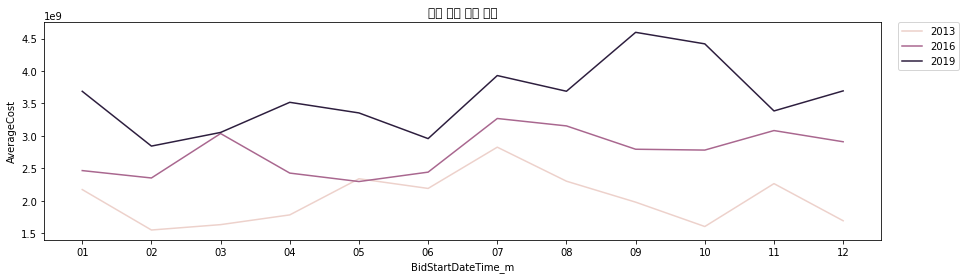

In [27]:
plt.figure(figsize=(15, 4))

a=sns.lineplot(data=df_2019, x="BidStartDateTime_m", y="AverageCost", hue="BidEndDateTime_y",ci=None)
a.set_title('월별 예가 가격 추이')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_

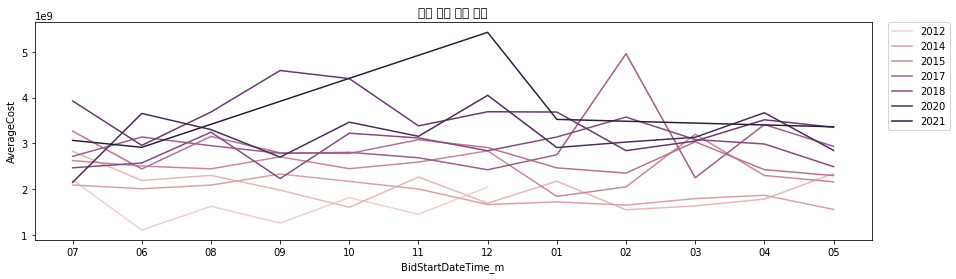

In [28]:
plt.figure(figsize=(15, 4))

a=sns.lineplot(data=df, x="BidStartDateTime_m", y="AverageCost", hue="BidEndDateTime_y",ci=None)
a.set_title('월별 예가 가격 추이')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_

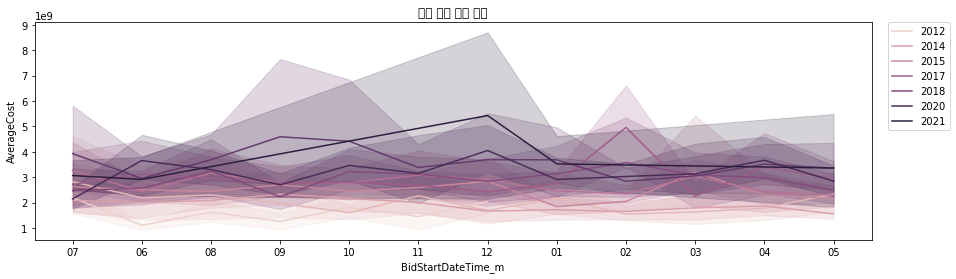

In [29]:
plt.figure(figsize=(15, 4))

a=sns.lineplot(data=df, x="BidStartDateTime_m", y="AverageCost", hue="BidEndDateTime_y")
a.set_title('월별 예가 가격 추이')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_

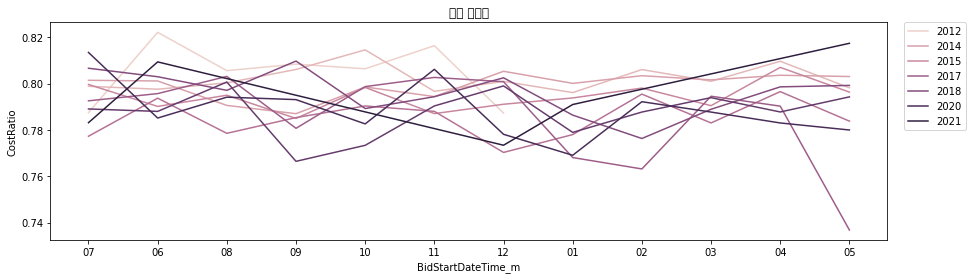

In [30]:
plt.figure(figsize=(15, 4))
a=sns.lineplot(data=df, x="BidStartDateTime_m", y="CostRatio", hue="BidEndDateTime_y",ci=None)
a.set_title('월별 투찰율')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_

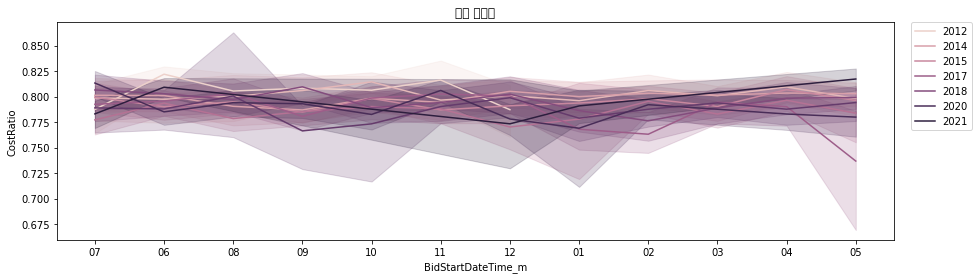

In [31]:
plt.figure(figsize=(15, 4))
a=sns.lineplot(data=df, x="BidStartDateTime_m", y="CostRatio", hue="BidEndDateTime_y")
a.set_title('월별 투찰율')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

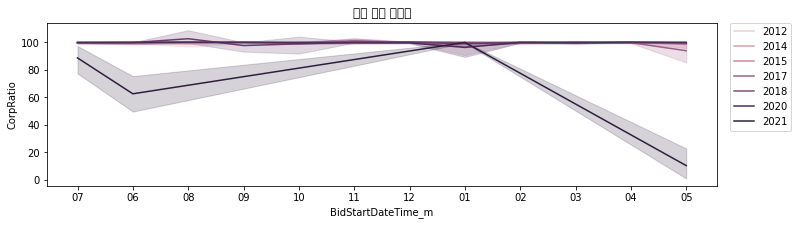

In [32]:
plt.figure(figsize=(12,3))
a=sns.lineplot(data=df, x="BidStartDateTime_m", y="CorpRatio", hue="BidStartDateTime_y")
a.set_title('월별 업체 사정율')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_

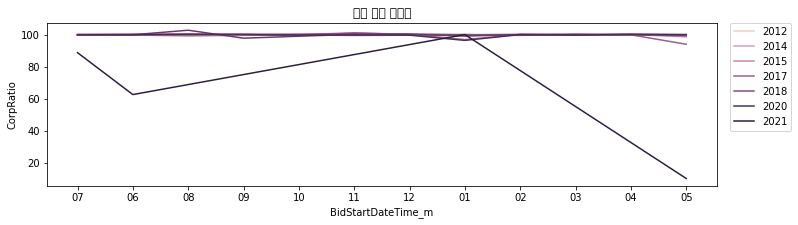

In [33]:
plt.figure(figsize=(12,3))
a=sns.lineplot(data=df, x="BidStartDateTime_m", y="CorpRatio", hue="BidStartDateTime_y",ci=None)
a.set_title('월별 업체 사정율')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

월별 업체 사정율을 보니 업체사정율에 이상치가 존재함을 알 수 있음 

Text(0.5, 1.0, '예정가격 추이')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50696 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_

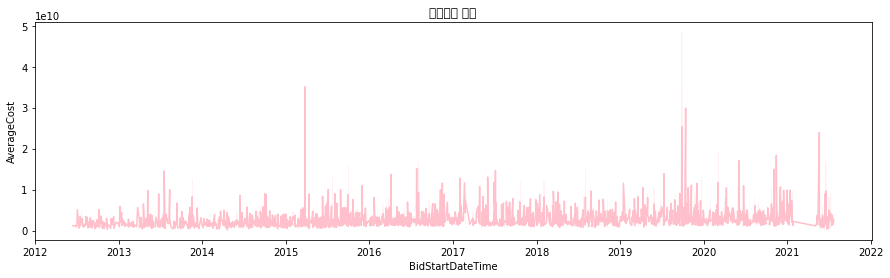

In [37]:
plt.rc('font',family='Malgun Gothic')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15, 4))
#sns.palplot(sns.color_palette("hls"))
bar=sns.lineplot(data=df, x="BidStartDateTime", y="AverageCost",color='pink')
bar.set_title('예정가격 추이')
#bar.color_palette("hls")

Text(0.5, 1.0, '투찰율 추이')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_

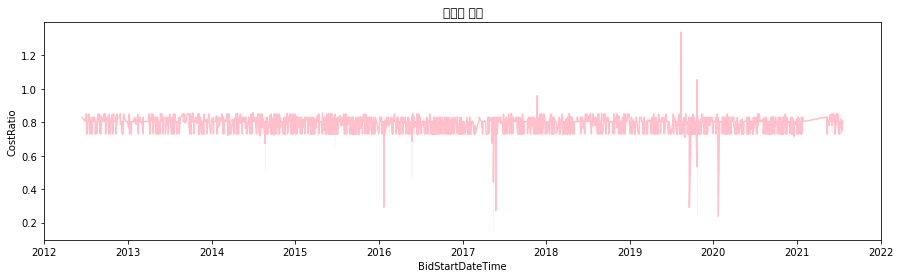

In [35]:
plt.rc('font',family='Malgun Gothic')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15, 4))
#sns.palplot(sns.color_palette("hls"))
bar=sns.lineplot(data=df, x="BidStartDateTime", y="CostRatio",color='pink')
bar.set_title('투찰율 추이')
#bar.color_palette("hls")

Text(0.5, 1.0, '업체별 사정율 추이')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_

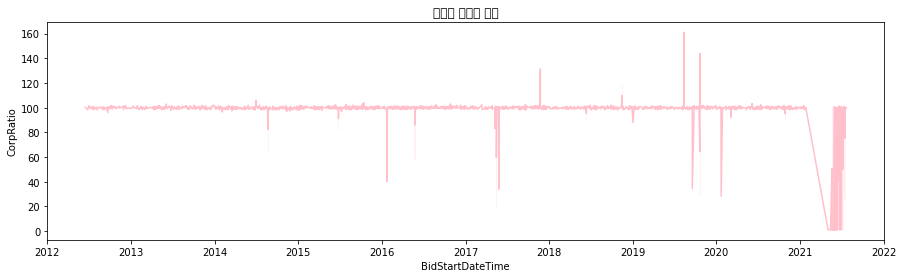

In [36]:
plt.rc('font',family='Malgun Gothic')
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(15, 4))
#sns.palplot(sns.color_palette("hls"))
bar=sns.lineplot(data=df, x="BidStartDateTime", y="CorpRatio",color='pink')
bar.set_title('업체별 사정율 추이')
#bar.color_palette("hls")

# <발주청>

In [38]:
df1=df[['HouseHold','DrawedCount','AverageCost','OrderOrgCode','GroundArea']]
df1=df1.groupby('OrderOrgCode')

## 발주청별 투찰 참가 수

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53804 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_

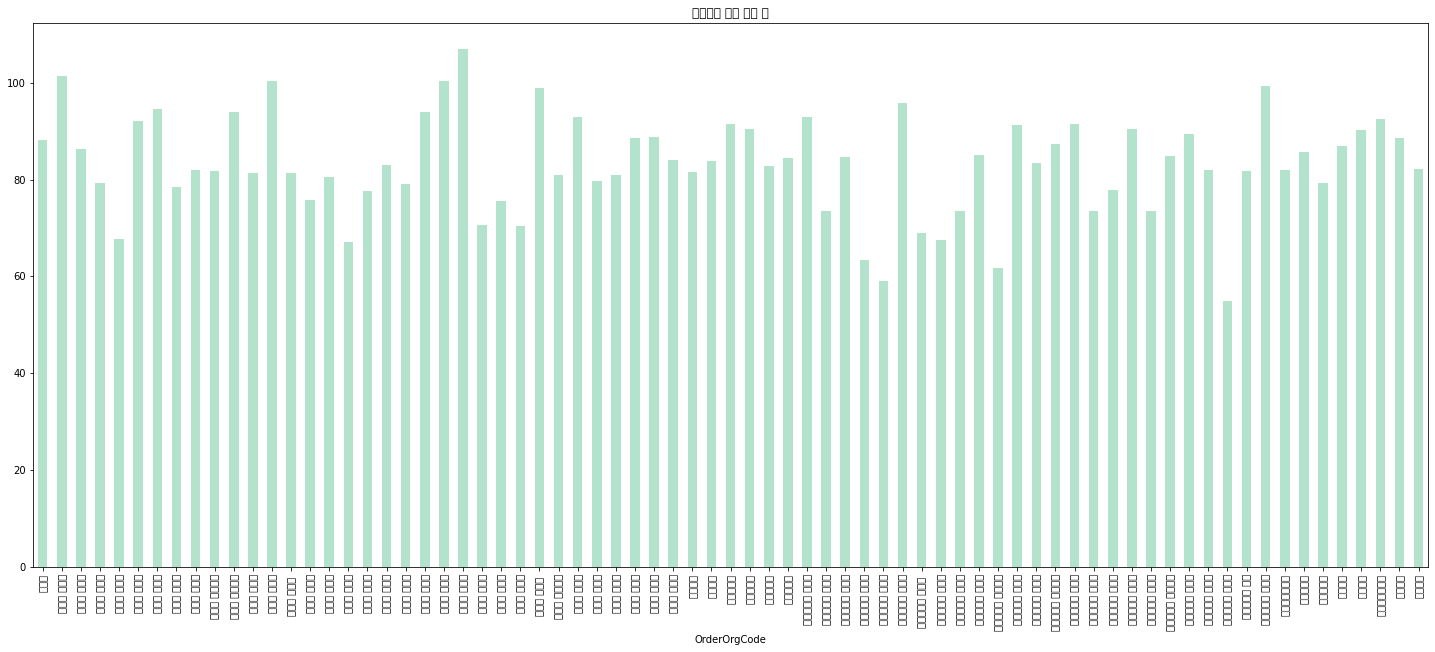

In [39]:
df1['DrawedCount'].mean().plot(kind='bar',colormap='Pastel2',figsize=(25,10),title='발주청별 투찰 참가 수')

## 발주청별 세대수 차이 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

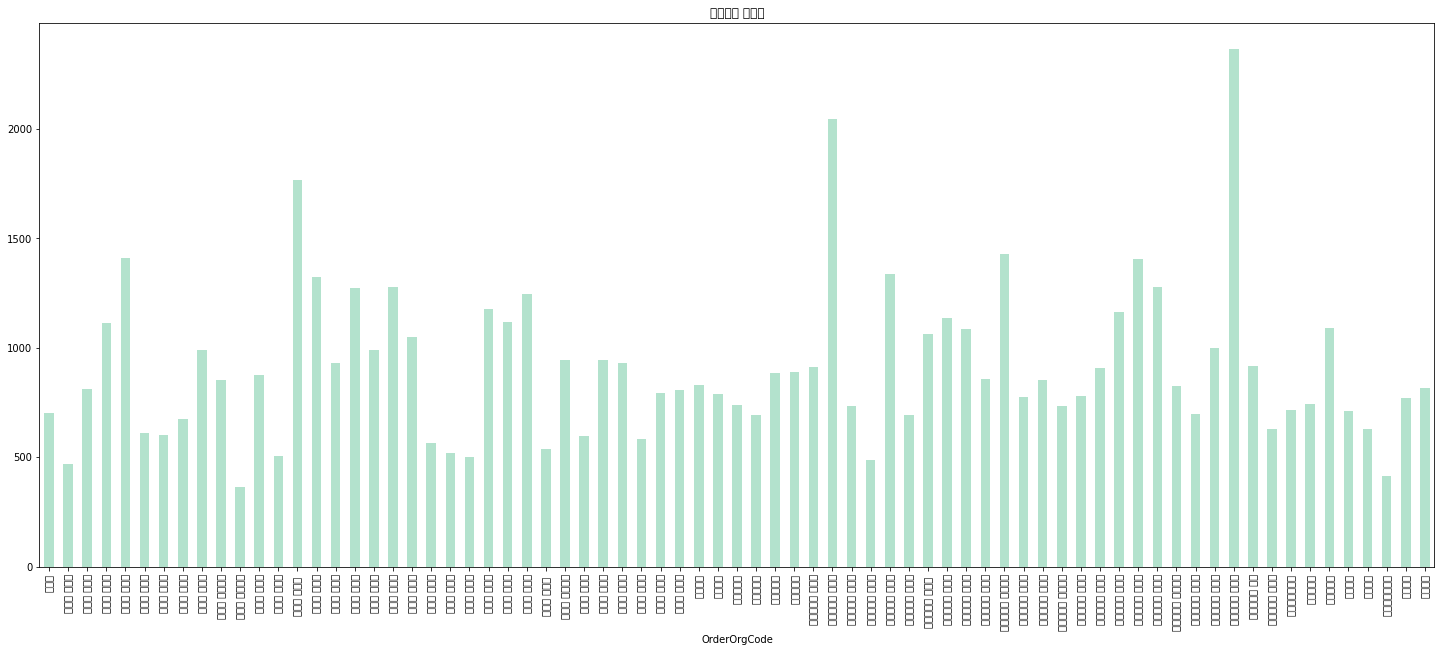

In [40]:
df1['HouseHold'].mean().plot(kind='bar',colormap='Pastel2',figsize=(25,10),title='발주청별 세대수')

## 발주청별 평균적인 예가 금액 차이가 있을지?

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_

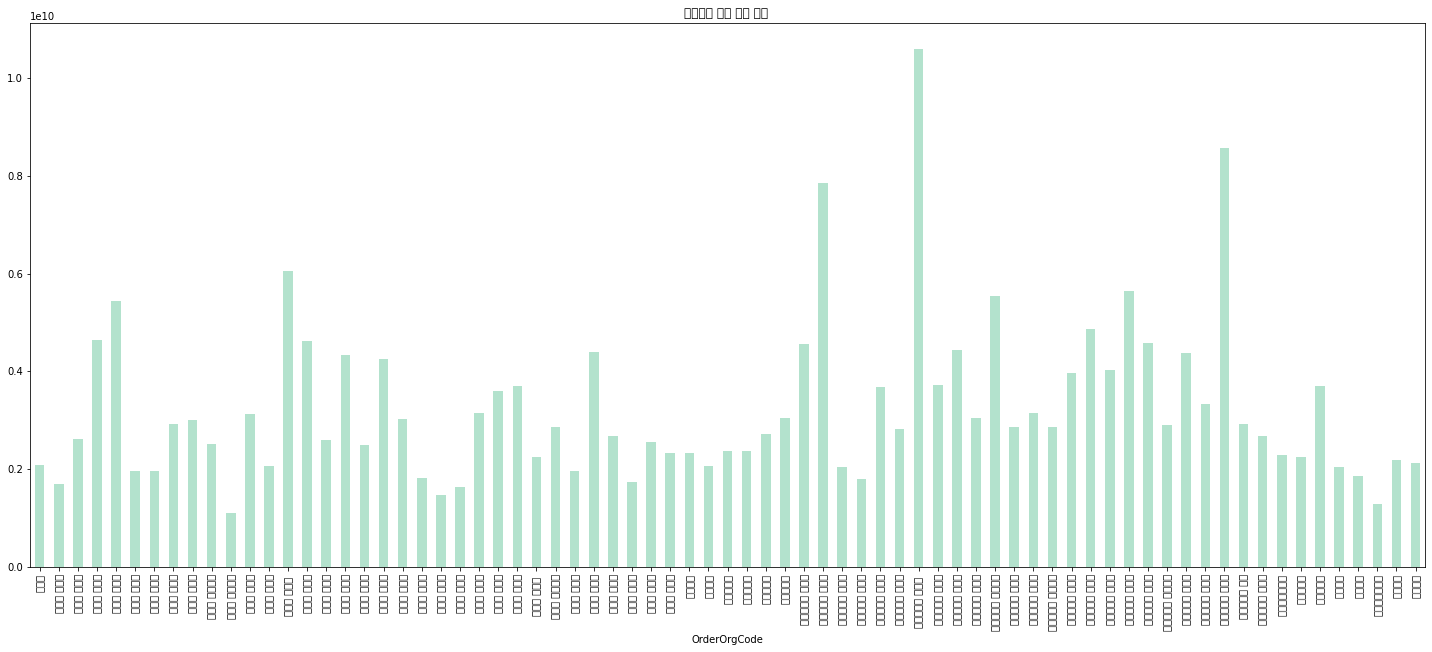

In [41]:
df1['AverageCost'].mean().plot(kind='bar',colormap='Pastel2',figsize=(25,10),title='발주청별 평균 예가 금액 ')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48156 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_

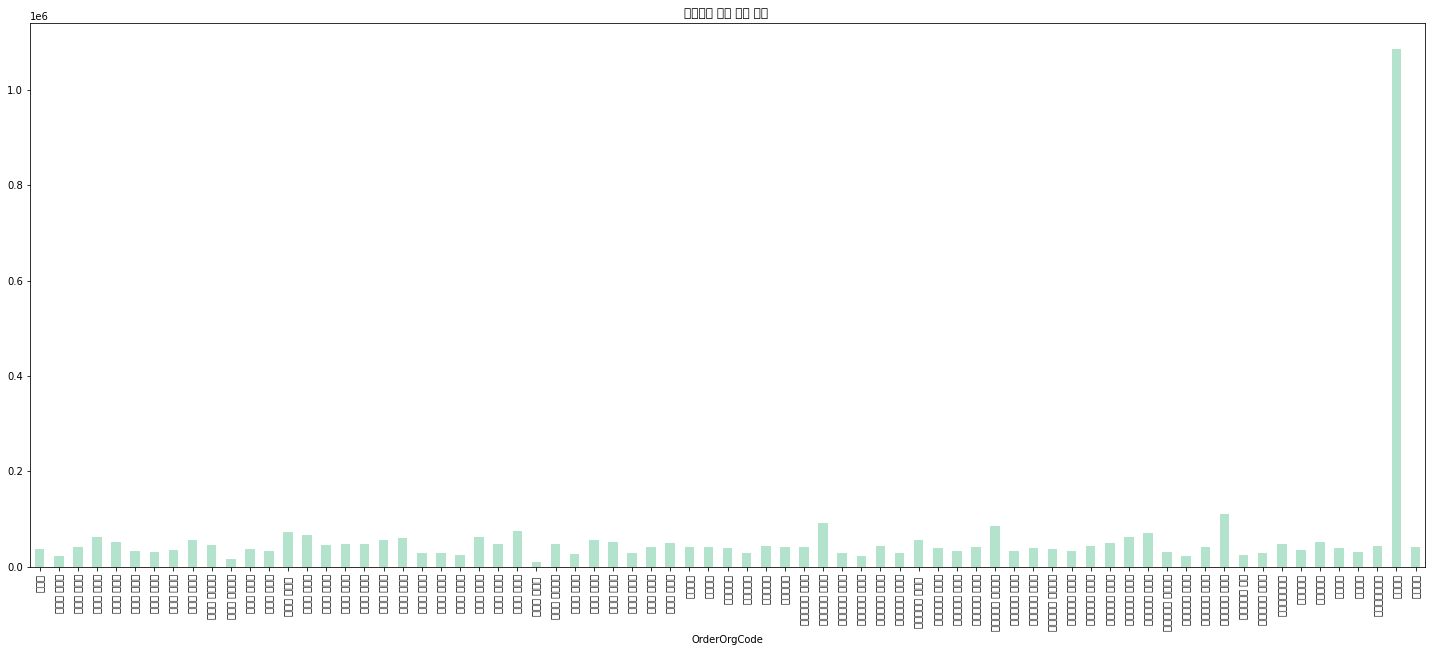

In [42]:
df1['GroundArea'].mean().plot(kind='bar',colormap='Pastel2',figsize=(25,10),title='발주청별 평균 대지 면적 ')

# 공고 번호가 같은 건 버리기, 타입 변환

In [43]:
df.drop_duplicates(['G2BNumTxt'],inplace = True)
df = df.astype({'IsVAT': object})
df

,NO,BidID,DongilCategoryCode,G2BNumTxt,ActCode,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,CostRatioType,BidLimitRatio,HouseHold,GroundArea,SuccessCorpID,AverageCost,AboveCount,DrawedCount,Sno,BidRank,CorpID,RegistNum,CorpName,WantCost,CostRatio,SelectedNum,BiddingDateTime,BaseRatio,CorpRatio,CorpConversionRatio,CorpConversionRatio100,WantCostScore,PQScore,TotalScore,IsDetermine,C/P,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,BidEndDateTime_y,BidOpenDateTime_y,BidStartDateTime_y,BiddingDateTime_y,BidStartDateTime_m,BidStartDateTime_d,BidEndDateTime_m,BidEndDateTime_d,BidOpenDateTime_m,BidOpenDateTime_d,BiddingDateTime_m,BiddingDateTime_d,BidStartDateTime_HR,BidEndDateTime_HR,BidOpenDateTime_HR
0,0,BID2012060003,HousingCat,20120632471,HousingAct,2012-07-10 09:00:00,2012-07-11 10:00:00,2012-07-11 11:00:00,52880351000,1224152242,1,-3% ~ +3%,0.8045,637,32761.0,COR0000203,1221367350,7,86,2446,1,COR0000203,1148164961,주식회사 혜원까치종합건축사사무소,982663800,0.804560,11 08,2012-07-10,0.802730,99.779995,NaN,NaN,NaN,NaN,NaN,1,0.997725,대구광역시,25.9,6.5,2.5,67.4,2012,2012,2012,2012,07,10,07,11,07,11,07,10,9,10,11
1,85,BID2012060004,HousingCat,20120632367,HousingAct,2012-06-29 16:00:00,2012-07-09 10:00:00,2012-07-09 11:00:00,33870622000,910811790,1,-3% ~ +3%,0.8295,319,17115.0,COR0000259,923408375,7,96,2532,1,COR0000259,2118170269,(주)종합건축사사무소 가전,766153000,0.829701,04 09,2012-07-06,0.841176,101.407593,NaN,NaN,NaN,NaN,NaN,1,1.013830,충청북도,20.9,102.5,3.2,88.8,2012,2012,2012,2012,06,29,07,09,07,09,07,06,16,10,11
2,181,BID2012060005,HousingCat,20120629711,HousingAct,2012-07-05 09:00:00,2012-07-05 18:00:00,2012-07-06 09:00:00,231773056000,5128141104,1,-3% ~ +3%,0.7295,1967,112801.0,COR0000074,5101526100,7,65,2628,1,COR0000074,1188112617,주식회사 영화키스톤건축사사무소,3723116000,0.729804,01 04,2012-07-05,0.726017,99.522506,NaN,NaN,NaN,NaN,NaN,1,0.994810,경기도 화성시,22.7,72.0,2.1,89.6,2012,2012,2012,2012,07,05,07,05,07,06,07,05,9,18,9
3,269,BID2012060007,HousingCat,20120626457,HousingAct,2012-07-03 09:00:00,2012-07-04 10:00:00,2012-07-04 11:00:00,116602943000,2629687871,1,-3% ~ +3%,0.7295,1310,64263.0,COR0000209,2647037275,7,62,2715,1,COR0000209,1088140227,주식회사 빅스코이엔씨,1931546008,0.729701,10 05,2012-07-03,0.734515,100.687500,NaN,NaN,NaN,NaN,NaN,1,1.006598,경상남도,22.7,25.0,1.5,78.1,2012,2012,2012,2012,07,03,07,04,07,04,07,03,9,10,11
4,336,BID2012060008,HousingCat,20120626429,HousingAct,2012-07-02 10:30:00,2012-07-03 10:00:00,2012-07-03 11:00:00,50958014000,1180791391,1,-3% ~ +3%,0.8295,478,22053.0,COR0000222,1168449200,7,96,2777,1,COR0000222,2068148256,(주)엄앤드이종합건축사사무소,993720000,0.850461,13 06,2012-07-02,0.841571,101.455236,NaN,NaN,NaN,NaN,NaN,1,0.989548,경상남도,24.0,0.0,2.5,62.8,2012,2012,2012,2012,07,02,07,03,07,03,07,02,10,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,233501,BID2021070041,HousingCat,20210708732,HousingAct,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,175627517000,3930175012,0,-3% ~ +3%,0.7295,1103,91915.0,COR0000234,3909315650,7,65,543859,1,COR0000234,1208160368,주식회사 포스코에이앤씨건축사사무소,2852728000,0.729726,03 15,2021-07-16,0.725853,99.500022,0.03093,100.03093,15.0,70.0,85.0,1,0.989395,경기도 화성시,28.8,0.0,2.2,68.4,2021,2021,2021,2021,07,15,07,19,07,19,07,16,10,10,11
2760,233654,BID2021070045,HousingCat,20210709335,HousingAct,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,101147256000,2285734794,0,-3% ~ +3%,0.8045,919,39184.4,COR0000244,2287877725,7,86,544835,1,COR0000244,1228161010,주식회사승우엔지니어링,1841197000,0.804762,09 03,2021-07-16,0.805516,100.126347,NaN,NaN,NaN,NaN,NaN,1,0.991368,충청북도,28.8,0.0,2.2,68.4,2021,2021,2021,2021,07,15,07,19,07,19,07,16,10,10,11
2761,233742,BID2021070047,HousingCat,20210709411,HousingAct,2021-07-16 10:00:00,2021-07-20 14:00:00,2021-07-20 15:00:00,146050093000,3281306596,0,-3% ~ +3%,0.8045,706,

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2737 entries, 0 to 2766
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   NO                      2737 non-null   int64         
 1   BidID                   2737 non-null   object        
 2   DongilCategoryCode      2737 non-null   object        
 3   G2BNumTxt               2737 non-null   int64         
 4   ActCode                 2737 non-null   object        
 5   BidStartDateTime        2737 non-null   datetime64[ns]
 6   BidEndDateTime          2737 non-null   datetime64[ns]
 7   BidOpenDateTime         2737 non-null   datetime64[ns]
 8   SupervisionConstCost    2737 non-null   int64         
 9   BaseCost                2737 non-null   int64         
 10  IsVAT                   2737 non-null   object        
 11  CostRatioType           2737 non-null   object        
 12  BidLimitRatio           2737 non-null   float64 

# CorpRatio 이상한거 바꾸기 

In [45]:
df1 = df[['G2BNumTxt','RegistNum', 'CorpRatio','HouseHold']]
df1

,G2BNumTxt,RegistNum,CorpRatio,HouseHold
0,20120632471,1148164961,99.779995,637
1,20120632367,2118170269,101.407593,319
2,20120629711,1188112617,99.522506,1967
3,20120626457,1088140227,100.687500,1310
4,20120626429,2068148256,101.455236,478
...,...,...,...,...
2758,20210708732,1208160368,99.500022,1103
2760,20210709335,1228161010,100.126347,919
2761,20210709411,2208126786,98.800249,706
2765,20210712781,1058132709,99.670513,810


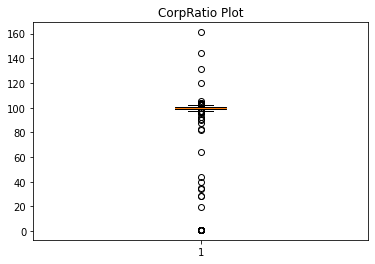

In [46]:
a = plt.boxplot(df['CorpRatio'] )#, vert=False) 
plt.title('CorpRatio Plot')
plt.show()

In [47]:
df1 = df1.sort_values(by=['CorpRatio'], ascending=[True]) 
df1.iloc[50:71]

,G2BNumTxt,RegistNum,CorpRatio,HouseHold
2642,20210502787,1058196232,1.028847,927
1582,20170506572,3128173652,19.473324,662
2291,20200113376,4098119762,28.297777,312
2235,20191013745,1078149604,28.668112,410
1572,20170517628,1228607762,33.885763,554
2206,20190910138,5718800970,34.563620,430
1131,20160109653,3018131079,40.039605,2708
1273,20160519240,2208141152,44.044798,678
517,20140810590,6038149719,64.041398,995
844,20150621521,1208160368,81.974569,854


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2737 entries, 0 to 2766
Data columns (total 57 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   NO                      2737 non-null   int64         
 1   BidID                   2737 non-null   object        
 2   DongilCategoryCode      2737 non-null   object        
 3   G2BNumTxt               2737 non-null   int64         
 4   ActCode                 2737 non-null   object        
 5   BidStartDateTime        2737 non-null   datetime64[ns]
 6   BidEndDateTime          2737 non-null   datetime64[ns]
 7   BidOpenDateTime         2737 non-null   datetime64[ns]
 8   SupervisionConstCost    2737 non-null   int64         
 9   BaseCost                2737 non-null   int64         
 10  IsVAT                   2737 non-null   object        
 11  CostRatioType           2737 non-null   object        
 12  BidLimitRatio           2737 non-null   float64 

In [49]:
#20170506572 -> int는바뀌고 float은 안바뀜,,
df['CorpRatio'].replace(19.473324,100.485037,inplace=True)
df['WantCost'].replace(423659030,2186139000,inplace=True)

#20200113376
df['CorpRatio'].replace(28.297777,99.3942007,inplace=True)
df['WantCost'].replace(483737379, 1699097805,inplace=True)

#20191013745
df['CorpRatio'].replace(28.668112,98.799790,inplace=True)
df['WantCost'].replace(560111689,1930330000,inplace=True)

#20170517628
df['CorpRatio'].replace(33.885763,99.901055,inplace=True)
df['WantCost'].replace(442750630,1305305000,inplace=True)

#20190910138
df['CorpRatio'].replace(34.563620,98.944523,inplace=True)
df['WantCost'].replace(361414700,1034614000,inplace=True)

#20160109653
df['CorpRatio'].replace(40.039605,100.469983,inplace=True)
df['WantCost'].replace(2350051000,5896901000 ,inplace=True)


In [50]:
# *100해줘야 하는 값들 곱하기 100해주기 
df= df.sort_values(by=['CorpRatio'], ascending=[True]) 
df.iloc[:51,29:30] = df.iloc[:51,29:30]  *100

In [51]:
# 100이 잘 곱해져있으므로 다시 작은 순으로 정렬 후 CorpRatio값 변경
df= df.sort_values(by=['CorpRatio'], ascending=[True])
df[['G2BNumTxt','RegistNum', 'CorpRatio','HouseHold','WantCost']].iloc[:10]

,G2BNumTxt,RegistNum,CorpRatio,HouseHold,WantCost
1582,20170506572,3128173652,19.473324,662,2186139000
2291,20200113376,4098119762,28.297777,312,1699097805
2235,20191013745,1078149604,28.668112,410,1930330000
1572,20170517628,1228607762,33.885763,554,1305305000
2206,20190910138,5718800970,34.563620,430,1034614000
1131,20160109653,3018131079,40.039605,2708,5896901000
1273,20160519240,2208141152,44.044798,678,864350000
517,20140810590,6038149719,64.041398,995,1180890000
844,20150621521,1208160368,81.974569,854,2015223000
1588,20170501498,1208125721,82.949546,490,722195000


In [52]:
# CorpRatio값 변경
df.iloc[0:1,29:30]  = 100.485037
df.iloc[1:2,29:30]  = 99.3942007
df.iloc[2:3,29:30]  = 98.799790
df.iloc[3:4,29:30]  = 99.901055
df.iloc[4:5,29:30]  = 98.944523
df.iloc[5:6,29:30]  = 100.469983


In [53]:
df= df.sort_values(by=['CorpRatio'], ascending=[True])
df[['G2BNumTxt','RegistNum', 'CorpRatio','HouseHold','WantCost']].iloc[:50]


,G2BNumTxt,RegistNum,CorpRatio,HouseHold,WantCost
1273,20160519240,2208141152,44.044798,678,864350000
517,20140810590,6038149719,64.041398,995,1180890000
844,20150621521,1208160368,81.974569,854,2015223000
1588,20170501498,1208125721,82.949546,490,722195000
2006,20181234277,1358118222,87.873731,332,2518577000
1890,20180603399,1358123685,89.798991,817,2183184000
2554,20201018156,1358118988,90.825258,861,2111629000
2306,20200246656,1298145777,92.218929,878,2609280000
616,20141116006,3101369605,94.759320,805,1541280396
58,20120906948,1248140480,96.202145,110,468647904


In [54]:
# 다시 G2BNumTxt 로 정렬 

df= df.sort_values(by=['G2BNumTxt'], ascending=[True])
#df= df.sort_values(by=['BiddingDateTime'], ascending=[True])
df['CorpRatio']

6       100.317525
5        98.363508
4       101.455236
3       100.687500
2        99.522506
           ...    
2758     99.500022
2760    100.126347
2761     98.800249
2766    100.260883
2765     99.670513
Name: CorpRatio, Length: 2737, dtype: float64

In [55]:

#df.to_excel(excel_writer='/content/drive/MyDrive/동일건축 /0823.xlsx')

In [56]:
# 바뀐  데이터  다시  불러오기
df = pd.read_excel("/content/drive/MyDrive/동일건축 /0820.xlsx")
df

,Unnamed: 0,NO,BidID,DongilCategoryCode,G2BNumTxt,ActCode,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,CostRatioType,BidLimitRatio,HouseHold,GroundArea,SuccessCorpID,AverageCost,AboveCount,DrawedCount,Sno,BidRank,CorpID,RegistNum,CorpName,WantCost,CostRatio,SelectedNum,BiddingDateTime,BaseRatio,CorpRatio,CorpConversionRatio,CorpConversionRatio100,WantCostScore,PQScore,TotalScore,IsDetermine,C/P,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum
0,6,489,BID2012060011,HousingCat,20120612230,HousingAct,2012-06-14 09:00:00,2012-06-21 10:00:00,2012-06-21 11:00:00,51962242000,1203430970,1,-3% ~ +3%,0.8295,417,23638.0,COR0000231,1206932975,7,102,3002,1,COR0000231,1228161820,(주)태원종합기술단건축사사무소,1001415671,0.829719,04 10,2012-06-20,0.832134,100.317525,NaN,NaN,NaN,NaN,NaN,1,1.000293,충청북도,25.4,0.0,3.5,49.1
1,5,404,BID2012060010,HousingCat,20120613986,HousingAct,2012-06-25 09:00:00,2012-06-26 10:00:00,2012-06-26 11:00:00,52655286000,1219080050,1,-3% ~ +3%,0.8045,526,34995.9,COR0000211,1195640250,7,85,2917,1,COR0000211,2158173365,주식회사 휴먼텍코리아엔지니어링건축사사무소,964700000,0.806848,13 08,2012-06-25,0.791334,98.363508,NaN,NaN,NaN,NaN,NaN,1,0.991768,강원도,26.5,0.0,4.2,40.5
2,4,336,BID2012060008,HousingCat,20120626429,HousingAct,2012-07-02 10:30:00,2012-07-03 10:00:00,2012-07-03 11:00:00,50958014000,1180791391,1,-3% ~ +3%,0.8295,478,22053.0,COR0000222,1168449200,7,96,2777,1,COR0000222,2068148256,(주)엄앤드이종합건축사사무소,993720000,0.850461,13 06,2012-07-02,0.841571,101.455236,NaN,NaN,NaN,NaN,NaN,1,0.989548,경상남도,24.0,0.0,2.5,62.8
3,3,269,BID2012060007,HousingCat,20120626457,HousingAct,2012-07-03 09:00:00,2012-07-04 10:00:00,2012-07-04 11:00:00,116602943000,2629687871,1,-3% ~ +3%,0.7295,1310,64263.0,COR0000209,2647037275,7,62,2715,1,COR0000209,1088140227,주식회사 빅스코이엔씨,1931546008,0.729701,10 05,2012-07-03,0.734515,100.687500,NaN,NaN,NaN,NaN,NaN,1,1.006598,경상남도,22.7,25.0,1.5,78.1
4,2,181,BID2012060005,HousingCat,20120629711,HousingAct,2012-07-05 09:00:00,2012-07-05 18:00:00,2012-07-06 09:00:00,231773056000,5128141104,1,-3% ~ +3%,0.7295,1967,112801.0,COR0000074,5101526100,7,65,2628,1,COR0000074,1188112617,주식회사 영화키스톤건축사사무소,3723116000,0.729804,01 04,2012-07-05,0.726017,99.522506,NaN,NaN,NaN,NaN,NaN,1,0.994810,경기도 화성시,22.7,72.0,2.1,89.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,2758,233501,BID2021070041,HousingCat,20210708732,HousingAct,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,175627517000,3930175012,0,-3% ~ +3%,0.7295,1103,91915.0,COR0000234,3909315650,7,65,543859,1,COR0000234,1208160368,주식회사 포스코에이앤씨건축사사무소,2852728000,0.729726,03 15,2021-07-16,0.725853,99.500022,0.03093,100.03093,15.0,70.0,85.0,1,0.989395,경기도 화성시,28.8,0.0,2.2,68.4
2733,2760,233654,BID2021070045,HousingCat,20210709335,HousingAct,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,101147256000,2285734794,0,-3% ~ +3%,0.8045,919,39184.4,COR0000244,2287877725,7,86,544835,1,COR0000244,1228161010,주식회사승우엔지니어링,1841197000,0.804762,09 03,2021-07-16,0.805516,100.126347,NaN,NaN,NaN,NaN,NaN,1,0.991368,충청북도,28.8,0.0,2.2,68.4
2734,2761,233742,BID2021070047,HousingCat,20210709411,HousingAct,2021-07-16 10:00:00,2021-07-20 14:00:00,2021-07-20 15:00:00,146050093000,3281306596,0,-3% ~ +3%,0.8045,706,31110.0,COR0000250,3241012200,7,95,545369,1,COR0000250,2208126786,(주)서한종합건축사사무소,2608140000,0.804730,04 14,2021-07-20,0.794848,98.800249,0.02860,100.02860,25.0,60.0,85.0,1,0.984528,경기도 이천시,27.9,0.0,1.5,75.8
2735,2766,234234,BID2021070062,HousingCat,20210711768,HousingAct,2021-07-20 10:00:00,2021-07-22 10:00:00,2021-07-22 11:00:00,69608789000,1597852604,0,-3% ~ +3%,0.8045,506,19382.4,COR0000071,1601415850,7,86,546829,1,COR0000071,5138111531,주식회사 펨코엔지니어링 건축사사무소,1288826000,0.804804,14 07,2021-07-22,0.806599,100.260883,0.03780,100.03780,25.0,60.0,85.0,1,1.002230,경상북도,31.2,0.0,2.0,59.8


# 결정된 인자만 추가하기

In [57]:
df = df[['G2BNumTxt','BidStartDateTime', 'BidEndDateTime', 'BidOpenDateTime','SupervisionConstCost', 'BaseCost', 'IsVAT', 
    'BidLimitRatio', 'HouseHold', 'GroundArea', 'DrawedCount', 'BiddingDateTime', 
    'OrderOrgCode', 'Avetem','Rainfall', 'Avewind', 'Avehum','RegistNum','CorpRatio', 'C/P']]

# 전체 박스플랏

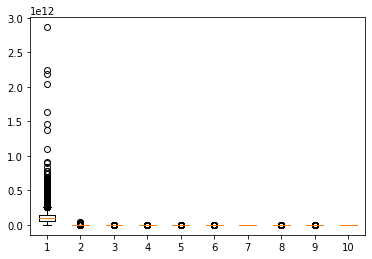

In [60]:
data_to_boxplot = [df['SupervisionConstCost'], df['BaseCost'], df['BidLimitRatio'], df['HouseHold'], df['GroundArea'], 
                   df['DrawedCount'], df['Avetem'], df['Rainfall'], df['Avewind'], df['Avehum']]
plt.boxplot(data_to_boxplot)
plt.show()

# GroundArea 이상치 제거

In [61]:
df_s = df.sort_values(by=["GroundArea"], ascending=[False]) 
df_s.head(5)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
2731,20210708492,2021-07-16 09:00:00,2021-07-20 12:00:00,2021-07-20 14:00:00,180757772000,4042699980,0,0.7295,1202,57699000.00,67,2021-07-19,충청남도,26.4,67.4,1.9,80.1,2158108826,100.304768,1.002918
2692,20210607102,2021-06-17 10:00:00,2021-06-21 14:00:00,2021-06-21 16:00:00,784618353000,17048187000,0,0.7295,4321,669700.25,25,2021-06-21,서울특별시 동대문구,23.6,0.0,2.2,67.0,1148119428,99.279594,0.987598
2202,20190920665,2019-09-27 09:00:00,2019-10-01 14:00:00,2019-10-01 15:00:00,2242436371000,48723657468,0,0.7295,12032,462771.40,19,2019-10-01,서울특별시 강동구,23.1,0.0,1.8,67.1,6108120549,99.410000,0.993303
242,20130919194,2013-10-01 12:00:00,2013-10-04 12:00:00,2013-10-04 13:00:00,17183195000,473779348,1,0.8495,180,382789.00,93,2013-10-02,경상북도,19.4,0.0,3.2,58.6,1348157159,101.999984,1.016788
333,20140118665,2014-02-03 09:00:00,2014-02-07 10:00:00,2014-02-07 11:00:00,111464510000,2515490712,1,0.8045,693,358986.00,100,2014-02-07,부산광역시,2.4,0.0,4.8,47.3,4098114831,96.460475,0.992358


In [62]:
df_s = df.sort_values(by=["GroundArea"], ascending=[False]) 
df_s.head(5)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
2731,20210708492,2021-07-16 09:00:00,2021-07-20 12:00:00,2021-07-20 14:00:00,180757772000,4042699980,0,0.7295,1202,57699000.00,67,2021-07-19,충청남도,26.4,67.4,1.9,80.1,2158108826,100.304768,1.002918
2692,20210607102,2021-06-17 10:00:00,2021-06-21 14:00:00,2021-06-21 16:00:00,784618353000,17048187000,0,0.7295,4321,669700.25,25,2021-06-21,서울특별시 동대문구,23.6,0.0,2.2,67.0,1148119428,99.279594,0.987598
2202,20190920665,2019-09-27 09:00:00,2019-10-01 14:00:00,2019-10-01 15:00:00,2242436371000,48723657468,0,0.7295,12032,462771.40,19,2019-10-01,서울특별시 강동구,23.1,0.0,1.8,67.1,6108120549,99.410000,0.993303
242,20130919194,2013-10-01 12:00:00,2013-10-04 12:00:00,2013-10-04 13:00:00,17183195000,473779348,1,0.8495,180,382789.00,93,2013-10-02,경상북도,19.4,0.0,3.2,58.6,1348157159,101.999984,1.016788
333,20140118665,2014-02-03 09:00:00,2014-02-07 10:00:00,2014-02-07 11:00:00,111464510000,2515490712,1,0.8045,693,358986.00,100,2014-02-07,부산광역시,2.4,0.0,4.8,47.3,4098114831,96.460475,0.992358


In [63]:
# 작은거 보기 
df_s = df.sort_values(by=["GroundArea"], ascending=[True]) 
df_s.head(5)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
63,20121002527,2012-10-12 09:00:00,2012-10-12 17:00:00,2012-10-15 10:00:00,81234337000,1853721458,1,0.8045,942,26.212,80,2012-10-12,전라북도,14.9,0.0,1.8,51.8,2088118350,99.874808,0.994005
140,20130342767,2013-04-08 14:00:00,2013-04-08 17:00:00,2013-04-10 15:00:00,129409349000,2913705400,1,0.8045,970,57.185,82,2013-04-08,경기도 하남시,8.0,1.0,4.0,55.1,1398113044,98.722140,0.986840
2708,20210628584,2021-06-29 09:00:00,2021-07-01 10:00:00,2021-07-01 11:00:00,19410162000,531834001,0,0.8495,52,2321.200,29,2021-07-01,대구광역시,26.3,0.0,1.8,70.9,1288645181,99.473015,0.994038
2680,20210539353,2021-06-09 09:00:00,2021-06-14 14:00:00,2021-06-14 15:00:00,7135505000,203891787,0,0.8495,48,3380.000,6,2021-06-14,경상남도,24.8,0.0,2.1,68.8,3118700522,100.062658,0.997668
394,20140415758,2014-04-21 10:00:00,2014-04-23 10:00:00,2014-04-23 11:00:00,5996516000,172404632,1,0.8495,48,3686.600,68,2014-04-23,경상남도,17.2,0.0,2.5,49.4,1058132709,99.299637,0.992783


In [64]:
df = df[df.G2BNumTxt != 20210708492]
df['GroundArea'].replace(26.212, 26212,inplace=True)
df['GroundArea'].replace(57.185,  57185,inplace=True)
df

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
0,20120612230,2012-06-14 09:00:00,2012-06-21 10:00:00,2012-06-21 11:00:00,51962242000,1203430970,1,0.8295,417,23638.0,102,2012-06-20,충청북도,25.4,0.0,3.5,49.1,1228161820,100.317525,1.000293
1,20120613986,2012-06-25 09:00:00,2012-06-26 10:00:00,2012-06-26 11:00:00,52655286000,1219080050,1,0.8045,526,34995.9,85,2012-06-25,강원도,26.5,0.0,4.2,40.5,2158173365,98.363508,0.991768
2,20120626429,2012-07-02 10:30:00,2012-07-03 10:00:00,2012-07-03 11:00:00,50958014000,1180791391,1,0.8295,478,22053.0,96,2012-07-02,경상남도,24.0,0.0,2.5,62.8,2068148256,101.455236,0.989548
3,20120626457,2012-07-03 09:00:00,2012-07-04 10:00:00,2012-07-04 11:00:00,116602943000,2629687871,1,0.7295,1310,64263.0,62,2012-07-03,경상남도,22.7,25.0,1.5,78.1,1088140227,100.687500,1.006598
4,20120629711,2012-07-05 09:00:00,2012-07-05 18:00:00,2012-07-06 09:00:00,231773056000,5128141104,1,0.7295,1967,112801.0,65,2012-07-05,경기도 화성시,22.7,72.0,2.1,89.6,1188112617,99.522506,0.994810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,20210708732,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,175627517000,3930175012,0,0.7295,1103,91915.0,65,2021-07-16,경기도 화성시,28.8,0.0,2.2,68.4,1208160368,99.500022,0.989395
2733,20210709335,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,101147256000,2285734794,0,0.8045,919,39184.4,86,2021-07-16,충청북도,28.8,0.0,2.2,68.4,1228161010,100.126347,0.991368
2734,20210709411,2021-07-16 10:00:00,2021-07-20 14:00:00,2021-07-20 15:00:00,146050093000,3281306596,0,0.8045,706,31110.0,95,2021-07-20,경기도 이천시,27.9,0.0,1.5,75.8,2208126786,98.800249,0.984528
2735,20210711768,2021-07-20 10:00:00,2021-07-22 10:00:00,2021-07-22 11:00:00,69608789000,1597852604,0,0.8045,506,19382.4,86,2021-07-22,경상북도,31.2,0.0,2.0,59.8,5138111531,100.260883,1.002230


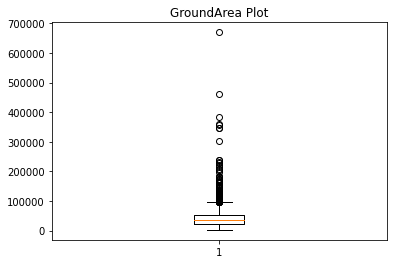

In [65]:
a = plt.boxplot(df['GroundArea'] )#, vert=False) 
plt.title('GroundArea Plot')
plt.show()

# SupervisionConstCost 이상치 제거

In [66]:
df_s = df.sort_values(by=["SupervisionConstCost"], ascending=[False]) 
df_s.head(6)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
1992,20181114849,2018-11-21 10:00:00.000,2018-11-23 14:00:00,2018-11-23 16:00:00,2863409795000,2777507501,0,0.8045,936,45732.00,88,2018-11-23,인천광역시,1.9,0.0,1.4,29.6,2068178084,98.349533,0.978273
2202,20190920665,2019-09-27 09:00:00.000,2019-10-01 14:00:00,2019-10-01 15:00:00,2242436371000,48723657468,0,0.7295,12032,462771.40,19,2019-10-01,서울특별시 강동구,23.1,0.0,1.8,67.1,6108120549,99.410000,0.993303
1990,20181110928,2018-11-16 09:00:00.000,2018-11-20 14:00:00,2018-11-20 15:00:00,2182338705000,2116868543,0,0.8045,654,36395.30,100,2018-11-20,광주광역시,6.5,0.2,1.8,39.9,1058672502,100.939991,1.009333
1666,20170902728,2017-09-12 09:59:59.995,2017-09-14 14:00:00,2017-09-14 15:00:00,2035836495000,1974761400,0,0.8045,748,39006.00,93,2017-09-14,부산광역시,22.4,0.0,1.7,48.8,2078134828,99.008398,0.989733
734,20150324813,2015-03-26 13:50:00.000,2015-03-31 11:00:00,2015-03-31 14:00:00,1634197093000,35507833000,1,0.7295,9510,346570.50,21,2015-03-31,서울특별시 송파구,12.9,2.5,2.2,80.6,3018136564,99.130354,0.988515
1703,20171013018,2017-10-25 09:59:59.995,2017-10-27 12:00:00,2017-10-27 14:00:00,1457057745000,1413346013,0,0.8045,561,31426.45,93,2017-10-26,울산광역시,14.5,0.0,1.2,56.5,5028137278,98.982367,0.989668


In [67]:
df_s = df.sort_values(by=["SupervisionConstCost"], ascending=[True]) 
df_s.head(6)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
394,20140415758,2014-04-21 10:00:00.000,2014-04-23 10:00:00,2014-04-23 11:00:00,5996516000,172404632,1,0.8495,48,3686.6,68,2014-04-23,경상남도,17.2,0.0,2.5,49.4,1058132709,99.299637,0.992783
2715,20210634447,2021-06-25 10:00:00.000,2021-06-29 10:00:00,2021-06-29 11:00:00,6962661000,209449190,0,0.8495,71,5223.0,3,2021-06-29,전라남도,23.9,8.0,1.8,78.6,5028178570,101.688284,0.999055
1885,20180626732,2018-06-29 09:00:00.000,2018-07-03 11:47:00,2018-07-03 12:47:00,7004366000,1607480403,0,0.8295,464,16844.0,109,2018-07-03,대구광역시,27.4,0.1,0.8,74.4,1298111485,102.013567,1.020130
2680,20210539353,2021-06-09 09:00:00.000,2021-06-14 14:00:00,2021-06-14 15:00:00,7135505000,203891787,0,0.8495,48,3380.0,6,2021-06-14,경상남도,24.8,0.0,2.1,68.8,3118700522,100.062658,0.997668
513,20140810210,2014-08-22 10:00:00.000,2014-08-26 11:00:00,2014-08-26 14:00:00,8509911000,1938183357,1,0.8045,803,44910.8,86,2014-08-26,경상북도,25.4,11.5,2.5,71.4,1358123685,99.586633,0.995398
2510,20200912171,2020-09-21 09:59:59.995,2020-09-23 10:00:00,2020-09-23 14:00:00,9126219000,2162852000,1,0.8495,256,6355.1,128,2020-09-23,서울특별시 강남구,19.2,0.0,3.3,59.9,2078135434,100.665484,1.006553


In [68]:
df['SupervisionConstCost'].replace(2863409795000,123422836000,inplace=True)
df['SupervisionConstCost'].replace(2182338705000,93346110000,inplace=True)
df['SupervisionConstCost'].replace(2035836495000,86784270000,inplace=True)
df['SupervisionConstCost'].replace(1457057745000,61311077000,inplace=True)

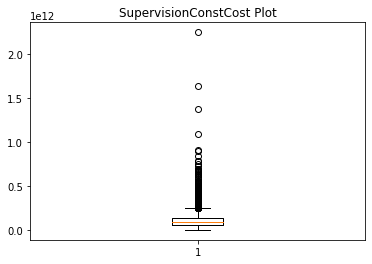

In [69]:
a = plt.boxplot(df['SupervisionConstCost'] )#, vert=False) 
plt.title('SupervisionConstCost Plot')
plt.show()

In [70]:
# BaseCost 이상치 제거

In [71]:
df_s = df.sort_values(by=["BaseCost"], ascending=[False]) 
df_s.head(6)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
2202,20190920665,2019-09-27 09:00:00.000,2019-10-01 14:00:00,2019-10-01 15:00:00,2242436371000,48723657468,0,0.7295,12032,462771.4,19,2019-10-01,서울특별시 강동구,23.1,0.0,1.8,67.1,6108120549,99.410000,0.993303
734,20150324813,2015-03-26 13:50:00.000,2015-03-31 11:00:00,2015-03-31 14:00:00,1634197093000,35507833000,1,0.7295,9510,346570.5,21,2015-03-31,서울특별시 송파구,12.9,2.5,2.2,80.6,3018136564,99.130354,0.988515
2218,20191004319,2019-10-14 10:00:00.000,2019-10-16 17:00:00,2019-10-17 14:00:00,1375270167000,29881870180,0,0.7295,6642,303209.0,21,2019-10-16,서울특별시 강남구,14.6,0.0,1.6,58.3,2088102969,100.079999,0.988003
2651,20210507969,2021-05-20 09:00:00.000,2021-05-24 12:00:00,2021-05-24 14:00:00,1094249710000,23775858000,0,0.8045,744,89979.8,30,2021-05-23,경기도 파주시,19.5,0.0,1.7,64.4,2118661197,101.107883,1.006805
2312,20200210992,2020-03-03 10:00:00.000,2020-03-05 12:00:00,2020-03-05 14:00:00,906385537000,19693944968,0,0.7295,2990,119799.8,34,2020-03-05,서울특별시 서초구,1.4,0.0,2.5,47.5,4088142391,100.126452,1.001130
2568,20201106025,2020-11-13 09:59:59.995,2020-11-17 12:00:00,2020-11-17 14:00:00,842880369000,18314104658,1,0.7295,4043,227312.0,63,2020-11-16,부산광역시,12.4,0.0,1.6,70.1,2158108826,100.081814,0.987633


In [72]:
df_s = df.sort_values(by=["BaseCost"], ascending=[True]) 
df_s.head(6)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
394,20140415758,2014-04-21 10:00:00.000,2014-04-23 10:00:00,2014-04-23 11:00:00,5996516000,172404632,1,0.8495,48,3686.6,68,2014-04-23,경상남도,17.2,0.0,2.5,49.4,1058132709,99.299637,0.992783
2680,20210539353,2021-06-09 09:00:00.000,2021-06-14 14:00:00,2021-06-14 15:00:00,7135505000,203891787,0,0.8495,48,3380.0,6,2021-06-14,경상남도,24.8,0.0,2.1,68.8,3118700522,100.062658,0.997668
2715,20210634447,2021-06-25 10:00:00.000,2021-06-29 10:00:00,2021-06-29 11:00:00,6962661000,209449190,0,0.8495,71,5223.0,3,2021-06-29,전라남도,23.9,8.0,1.8,78.6,5028178570,101.688284,0.999055
388,20140409737,2014-04-15 09:59:59.995,2014-04-17 10:00:00,2014-04-17 11:00:00,10741123000,301522657,1,0.8495,36,13324.0,87,2014-04-15,경기도 화성시,12.9,0.0,3.2,80.1,1238197700,100.040018,1.000260
355,20140238720,2014-03-07 09:00:00.000,2014-03-11 10:00:00,2014-03-11 11:00:00,12435827000,347466610,1,0.8495,76,4678.8,90,2014-03-10,대전광역시,1.5,0.0,3.0,50.4,6038149719,100.754600,1.007313
78,20121101070,2012-11-13 09:00:00.000,2012-11-14 10:00:00,2012-11-14 11:00:00,12977665000,362063009,1,0.8495,152,15903.0,91,2012-11-13,경상남도,5.3,0.0,3.6,54.8,1288122276,100.428346,1.009790


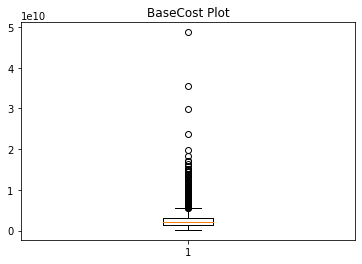

In [73]:
a = plt.boxplot(df['BaseCost'] )#, vert=False) 
plt.title('BaseCost Plot')
plt.show()

# BidLimitRatio


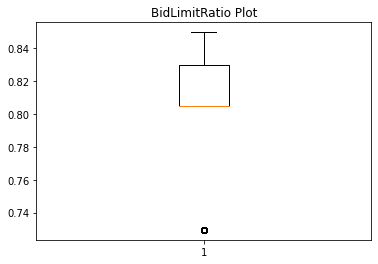

In [74]:
a = plt.boxplot(df['BidLimitRatio'] )#, vert=False) 
plt.title('BidLimitRatio Plot')
plt.show()

In [75]:
df_s = df.sort_values(by=["BidLimitRatio"], ascending=[True]) 
df_s.head(6)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
855,20150624107,2015-06-30 10:00:00.000,2015-07-02 10:00:00,2015-07-02 11:00:00,279978906000,6116242793,1,0.7295,2258,71423.0,49,2015-07-02,서울특별시 성북구,23.7,0.0,4.0,64.5,5028123570,98.955598,1.000158
162,20130443917,2013-05-13 11:00:00.000,2013-05-13 16:00:00,2013-05-14 14:00:00,141791782879,3883751740,1,0.7295,1037,66337.7,57,2013-05-13,서울특별시 서초구,21.6,0.0,3.5,45.0,2138154324,100.441308,1.003713
1975,20181025346,2018-11-06 10:00:00.000,2018-11-09 10:00:00,2018-11-09 15:00:00,353242019000,7675242000,0,0.7295,2099,106282.2,64,2018-11-09,경기도 과천시,12.1,1.0,3.1,69.0,3018119298,100.319889,1.003045
2251,20191114973,2019-11-20 09:00:00.000,2019-11-22 10:00:00,2019-11-22 14:00:00,251927334000,5544362053,0,0.7295,1252,69595.1,71,2019-11-21,전라남도,4.2,0.0,1.9,37.4,2118153940,100.129923,1.000508
1898,20180711500,2018-07-17 09:59:59.995,2018-07-19 10:00:00,2018-07-19 11:00:00,138314925000,3111297416,0,0.7295,1005,53898.0,68,2018-07-18,경기도 화성시,28.2,0.0,1.6,64.8,2138100226,101.864727,1.017095
1515,20170119704,2017-01-31 09:00:00.000,2017-02-02 12:00:00,2017-02-02 14:00:00,106171785000,2399588512,1,0.7295,1022,60711.0,57,2017-02-02,경기도 평택시,-2.7,0.0,2.7,52.9,6108119493,101.123633,1.010933


# HouseHold 이상치 제거

In [76]:
df_s = df.sort_values(by=["HouseHold"], ascending=[False]) 
df_s.head(6)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
2202,20190920665,2019-09-27 09:00:00.000,2019-10-01 14:00:00,2019-10-01 15:00:00,2242436371000,48723657468,0,0.7295,12032,462771.4,19,2019-10-01,서울특별시 강동구,23.1,0.0,1.8,67.1,6108120549,99.410000,0.993303
734,20150324813,2015-03-26 13:50:00.000,2015-03-31 11:00:00,2015-03-31 14:00:00,1634197093000,35507833000,1,0.7295,9510,346570.5,21,2015-03-31,서울특별시 송파구,12.9,2.5,2.2,80.6,3018136564,99.130354,0.988515
999,20150920616,2015-09-30 09:59:59.995,2015-10-02 11:00:00,2015-10-02 13:30:00,733688156761,15941576269,1,0.7295,6800,347962.0,25,2015-10-02,경기도 용인시,16.5,0.0,3.7,53.5,2158125903,100.279500,1.002000
2218,20191004319,2019-10-14 10:00:00.000,2019-10-16 17:00:00,2019-10-17 14:00:00,1375270167000,29881870180,0,0.7295,6642,303209.0,21,2019-10-16,서울특별시 강남구,14.6,0.0,1.6,58.3,2088102969,100.079999,0.988003
2270,20191216672,2019-12-18 09:59:59.995,2019-12-20 12:00:00,2019-12-20 14:00:00,625150754562,13583275594,0,0.7295,5190,166411.0,63,2019-12-19,인천광역시,-0.8,0.0,2.4,47.8,2118153940,99.479901,0.994135
1351,20160726796,2016-08-03 09:00:00.000,2016-08-05 12:00:00,2016-08-05 14:00:00,756920708000,16446372000,1,0.7295,4932,207860.3,47,2016-08-05,서울특별시 강동구,31.2,0.0,1.8,60.1,1268132399,102.158981,1.008353


In [77]:
df_s = df.sort_values(by=["HouseHold"], ascending=[True]) 
df_s.head(6)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
388,20140409737,2014-04-15 09:59:59.995,2014-04-17 10:00:00,2014-04-17 11:00:00,10741123000,301522657,1,0.8495,36,13324.0,87,2014-04-15,경기도 화성시,12.9,0.0,3.2,80.1,1238197700,100.040018,1.000260
221,20130817221,2013-08-27 09:00:00.000,2013-08-27 16:00:00,2013-08-27 17:00:00,15324573000,424688358,1,0.8495,39,14253.0,100,2013-08-27,경기도 화성시,25.6,0.0,2.6,61.6,6078608715,101.555500,1.007588
357,20140302605,2014-03-14 09:59:59.995,2014-03-18 10:00:00,2014-03-18 11:00:00,18665073000,512497927,1,0.8495,40,15566.8,92,2014-03-17,경상남도,12.6,0.5,3.5,79.0,2138627292,99.769702,0.996965
2680,20210539353,2021-06-09 09:00:00.000,2021-06-14 14:00:00,2021-06-14 15:00:00,7135505000,203891787,0,0.8495,48,3380.0,6,2021-06-14,경상남도,24.8,0.0,2.1,68.8,3118700522,100.062658,0.997668
394,20140415758,2014-04-21 10:00:00.000,2014-04-23 10:00:00,2014-04-23 11:00:00,5996516000,172404632,1,0.8495,48,3686.6,68,2014-04-23,경상남도,17.2,0.0,2.5,49.4,1058132709,99.299637,0.992783
2708,20210628584,2021-06-29 09:00:00.000,2021-07-01 10:00:00,2021-07-01 11:00:00,19410162000,531834001,0,0.8495,52,2321.2,29,2021-07-01,대구광역시,26.3,0.0,1.8,70.9,1288645181,99.473015,0.994038


In [78]:
df['HouseHold'].replace(40, 64,inplace=True)
df['HouseHold'].replace(52, 124,inplace=True)

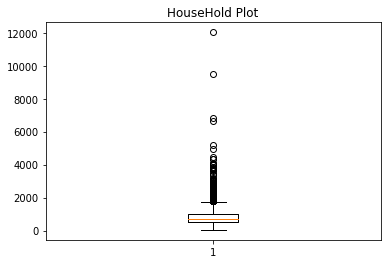

In [79]:
a = plt.boxplot(df['HouseHold'] )#, vert=False) 
plt.title('HouseHold Plot')
plt.show()

# DrawedCount 이상치

In [80]:
df_s = df.sort_values(by=["DrawedCount"], ascending=[False]) 
df_s.head(6)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
2510,20200912171,2020-09-21 09:59:59.995,2020-09-23 10:00:00,2020-09-23 14:00:00,9126219000,2162852000,1,0.8495,256,6355.1,128,2020-09-23,서울특별시 강남구,19.2,0.0,3.3,59.9,2078135434,100.665484,1.006553
2456,20200713482,2020-07-20 09:00:00.000,2020-07-22 12:00:00,2020-07-22 13:00:00,83638353000,1906292869,0,0.8495,286,44376.7,126,2020-07-21,경기도 김포시,25.0,0.0,1.6,77.0,1288645181,100.569003,0.998118
2179,20190824377,2019-09-02 10:00:00.000,2019-09-05 14:00:00,2019-09-05 16:00:00,57295305000,1323411691,0,0.8495,280,10054.4,126,2019-09-05,서울특별시 서초구,23.0,36.4,2.0,91.4,5068127001,99.848454,0.998240
1937,20180901055,2018-09-13 11:00:00.000,2018-09-17 11:00:00,2018-09-17 15:00:00,40434345000,1313588609,0,0.8495,251,21068.0,125,2018-09-17,경기도 성남시,22.3,0.1,1.9,64.3,6048131866,101.071382,1.010683
1935,20180900395,2018-09-11 10:00:00.000,2018-09-13 17:00:00,2018-09-14 14:00:00,45648610000,1087172727,0,0.8495,184,8558.3,124,2018-09-13,서울특별시 강남구,23.5,0.0,1.2,63.5,2078134828,101.009999,1.008840
201,20130707624,2013-07-18 13:00:00.000,2013-07-19 13:00:00,2013-07-19 14:00:00,31086018000,805096779,1,0.8495,290,19654.0,124,2013-07-19,충청남도,26.8,0.0,3.2,72.0,1248152860,99.359626,0.993475


In [81]:
df_s = df.sort_values(by=["DrawedCount"], ascending=[True]) 
df_s.head(6)

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
2715,20210634447,2021-06-25 10:00:00,2021-06-29 10:00:00,2021-06-29 11:00:00,6962661000,209449190,0,0.8495,71,5223.0,3,2021-06-29,전라남도,23.9,8.0,1.8,78.6,5028178570,101.688284,0.999055
2680,20210539353,2021-06-09 09:00:00,2021-06-14 14:00:00,2021-06-14 15:00:00,7135505000,203891787,0,0.8495,48,3380.0,6,2021-06-14,경상남도,24.8,0.0,2.1,68.8,3118700522,100.062658,0.997668
731,20150323440,2015-03-25 10:00:00,2015-03-27 10:00:00,2015-03-27 11:00:00,70191395000,1610750178,1,0.8045,620,28344.0,10,2015-03-27,경기도 광주시,9.1,0.0,2.6,50.5,2118637853,100.288728,0.999593
2202,20190920665,2019-09-27 09:00:00,2019-10-01 14:00:00,2019-10-01 15:00:00,2242436371000,48723657468,0,0.7295,12032,462771.4,19,2019-10-01,서울특별시 강동구,23.1,0.0,1.8,67.1,6108120549,99.410000,0.993303
734,20150324813,2015-03-26 13:50:00,2015-03-31 11:00:00,2015-03-31 14:00:00,1634197093000,35507833000,1,0.7295,9510,346570.5,21,2015-03-31,서울특별시 송파구,12.9,2.5,2.2,80.6,3018136564,99.130354,0.988515
2218,20191004319,2019-10-14 10:00:00,2019-10-16 17:00:00,2019-10-17 14:00:00,1375270167000,29881870180,0,0.7295,6642,303209.0,21,2019-10-16,서울특별시 강남구,14.6,0.0,1.6,58.3,2088102969,100.079999,0.988003


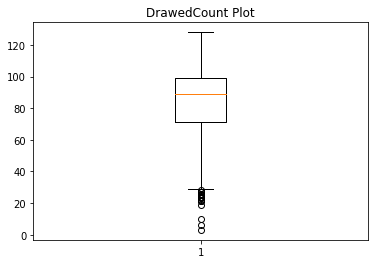

In [82]:
a = plt.boxplot(df['DrawedCount'] )#, vert=False) 
plt.title('DrawedCount Plot')
plt.show()

# 나머지 기온들 

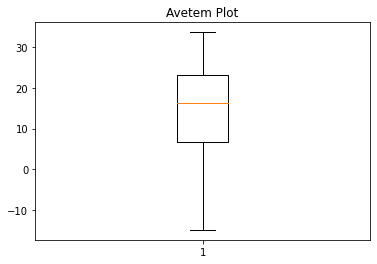

In [83]:
a = plt.boxplot(df['Avetem'] )#, vert=False) 
plt.title('Avetem Plot')
plt.show()

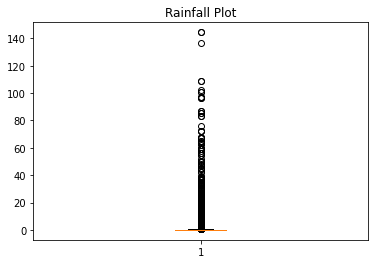

In [84]:
a = plt.boxplot(df['Rainfall'] )#, vert=False) 
plt.title('Rainfall Plot')
plt.show()

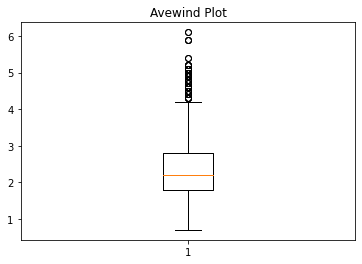

In [85]:
a = plt.boxplot(df['Avewind'] )#, vert=False) 
plt.title('Avewind Plot')
plt.show()

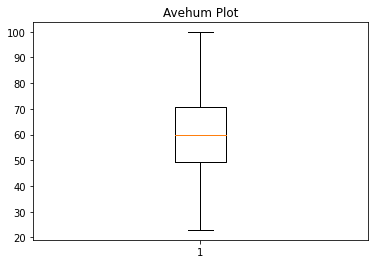

In [86]:
a = plt.boxplot(df['Avehum'] )#, vert=False) 
plt.title('Avehum Plot')
plt.show()

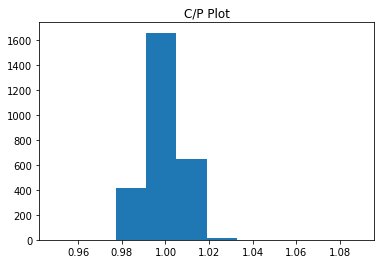

In [87]:
a = plt.hist(df['C/P'] )#, vert=False) 
plt.title('C/P Plot')
plt.show()

In [88]:
df_cy = df.copy()
df_cy

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
0,20120612230,2012-06-14 09:00:00,2012-06-21 10:00:00,2012-06-21 11:00:00,51962242000,1203430970,1,0.8295,417,23638.0,102,2012-06-20,충청북도,25.4,0.0,3.5,49.1,1228161820,100.317525,1.000293
1,20120613986,2012-06-25 09:00:00,2012-06-26 10:00:00,2012-06-26 11:00:00,52655286000,1219080050,1,0.8045,526,34995.9,85,2012-06-25,강원도,26.5,0.0,4.2,40.5,2158173365,98.363508,0.991768
2,20120626429,2012-07-02 10:30:00,2012-07-03 10:00:00,2012-07-03 11:00:00,50958014000,1180791391,1,0.8295,478,22053.0,96,2012-07-02,경상남도,24.0,0.0,2.5,62.8,2068148256,101.455236,0.989548
3,20120626457,2012-07-03 09:00:00,2012-07-04 10:00:00,2012-07-04 11:00:00,116602943000,2629687871,1,0.7295,1310,64263.0,62,2012-07-03,경상남도,22.7,25.0,1.5,78.1,1088140227,100.687500,1.006598
4,20120629711,2012-07-05 09:00:00,2012-07-05 18:00:00,2012-07-06 09:00:00,231773056000,5128141104,1,0.7295,1967,112801.0,65,2012-07-05,경기도 화성시,22.7,72.0,2.1,89.6,1188112617,99.522506,0.994810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,20210708732,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,175627517000,3930175012,0,0.7295,1103,91915.0,65,2021-07-16,경기도 화성시,28.8,0.0,2.2,68.4,1208160368,99.500022,0.989395
2733,20210709335,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,101147256000,2285734794,0,0.8045,919,39184.4,86,2021-07-16,충청북도,28.8,0.0,2.2,68.4,1228161010,100.126347,0.991368
2734,20210709411,2021-07-16 10:00:00,2021-07-20 14:00:00,2021-07-20 15:00:00,146050093000,3281306596,0,0.8045,706,31110.0,95,2021-07-20,경기도 이천시,27.9,0.0,1.5,75.8,2208126786,98.800249,0.984528
2735,20210711768,2021-07-20 10:00:00,2021-07-22 10:00:00,2021-07-22 11:00:00,69608789000,1597852604,0,0.8045,506,19382.4,86,2021-07-22,경상북도,31.2,0.0,2.0,59.8,5138111531,100.260883,1.002230


In [89]:
df.to_excel(excel_writer='/content/drive/MyDrive/동일건축 /0823_J.xlsx')


# 날짜  데이터






In [90]:

df['BidTime_y']=df['BidStartDateTime'].dt.year

In [91]:
#date.today().strftime('%Y%m%d')

df['BidStartDateTime_m'] = df['BidStartDateTime'].dt.strftime('%m')
df['BidStartDateTime_d'] = df['BidStartDateTime'].dt.strftime('%d')

df['BidEndDateTime_m'] = df['BidEndDateTime'].dt.strftime('%m')
df['BidEndDateTime_d'] = df['BidEndDateTime'].dt.strftime('%d')

df['BidOpenDateTime_m'] = df['BidOpenDateTime'].dt.strftime('%m')
df['BidOpenDateTime_d'] = df['BidOpenDateTime'].dt.strftime('%d')

df['BiddingDateTime_m'] = df['BiddingDateTime'].dt.strftime('%m')
df['BiddingDateTime_d'] = df['BiddingDateTime'].dt.strftime('%d')

In [92]:
df['BidStartDateTime_HR'] = df['BidStartDateTime'].dt.hour

df['BidEndDateTime_HR'] = df['BidEndDateTime'].dt.hour

df['BidOpenDateTime_HR'] = df['BidOpenDateTime'].dt.hour
df

,G2BNumTxt,BidStartDateTime,BidEndDateTime,BidOpenDateTime,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,BiddingDateTime,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P,BidTime_y,BidStartDateTime_m,BidStartDateTime_d,BidEndDateTime_m,BidEndDateTime_d,BidOpenDateTime_m,BidOpenDateTime_d,BiddingDateTime_m,BiddingDateTime_d,BidStartDateTime_HR,BidEndDateTime_HR,BidOpenDateTime_HR
0,20120612230,2012-06-14 09:00:00,2012-06-21 10:00:00,2012-06-21 11:00:00,51962242000,1203430970,1,0.8295,417,23638.0,102,2012-06-20,충청북도,25.4,0.0,3.5,49.1,1228161820,100.317525,1.000293,2012,06,14,06,21,06,21,06,20,9,10,11
1,20120613986,2012-06-25 09:00:00,2012-06-26 10:00:00,2012-06-26 11:00:00,52655286000,1219080050,1,0.8045,526,34995.9,85,2012-06-25,강원도,26.5,0.0,4.2,40.5,2158173365,98.363508,0.991768,2012,06,25,06,26,06,26,06,25,9,10,11
2,20120626429,2012-07-02 10:30:00,2012-07-03 10:00:00,2012-07-03 11:00:00,50958014000,1180791391,1,0.8295,478,22053.0,96,2012-07-02,경상남도,24.0,0.0,2.5,62.8,2068148256,101.455236,0.989548,2012,07,02,07,03,07,03,07,02,10,10,11
3,20120626457,2012-07-03 09:00:00,2012-07-04 10:00:00,2012-07-04 11:00:00,116602943000,2629687871,1,0.7295,1310,64263.0,62,2012-07-03,경상남도,22.7,25.0,1.5,78.1,1088140227,100.687500,1.006598,2012,07,03,07,04,07,04,07,03,9,10,11
4,20120629711,2012-07-05 09:00:00,2012-07-05 18:00:00,2012-07-06 09:00:00,231773056000,5128141104,1,0.7295,1967,112801.0,65,2012-07-05,경기도 화성시,22.7,72.0,2.1,89.6,1188112617,99.522506,0.994810,2012,07,05,07,05,07,06,07,05,9,18,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,20210708732,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,175627517000,3930175012,0,0.7295,1103,91915.0,65,2021-07-16,경기도 화성시,28.8,0.0,2.2,68.4,1208160368,99.500022,0.989395,2021,07,15,07,19,07,19,07,16,10,10,11
2733,20210709335,2021-07-15 10:00:00,2021-07-19 10:00:00,2021-07-19 11:00:00,101147256000,2285734794,0,0.8045,919,39184.4,86,2021-07-16,충청북도,28.8,0.0,2.2,68.4,1228161010,100.126347,0.991368,2021,07,15,07,19,07,19,07,16,10,10,11
2734,20210709411,2021-07-16 10:00:00,2021-07-20 14:00:00,2021-07-20 15:00:00,146050093000,3281306596,0,0.8045,706,31110.0,95,2021-07-20,경기도 이천시,27.9,0.0,1.5,75.8,2208126786,98.800249,0.984528,2021,07,16,07,20,07,20,07,20,10,14,15
2735,20210711768,2021-07-20 10:00:00,2021-07-22 10:00:00,2021-07-22 11:00:00,69608789000,1597852604,0,0.8045,506,19382.4,86,2021-07-22,경상북도,31.2,0.0,2.0,59.8,5138111531,100.260883,1.002230,2021,07,20,07,22,07,22,07,22,10,10,11


In [93]:
df.drop(["BidStartDateTime", "BidEndDateTime", "BidOpenDateTime","BiddingDateTime"], axis =1 , inplace = True)

In [94]:
df

,G2BNumTxt,SupervisionConstCost,BaseCost,IsVAT,BidLimitRatio,HouseHold,GroundArea,DrawedCount,OrderOrgCode,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P,BidTime_y,BidStartDateTime_m,BidStartDateTime_d,BidEndDateTime_m,BidEndDateTime_d,BidOpenDateTime_m,BidOpenDateTime_d,BiddingDateTime_m,BiddingDateTime_d,BidStartDateTime_HR,BidEndDateTime_HR,BidOpenDateTime_HR
0,20120612230,51962242000,1203430970,1,0.8295,417,23638.0,102,충청북도,25.4,0.0,3.5,49.1,1228161820,100.317525,1.000293,2012,06,14,06,21,06,21,06,20,9,10,11
1,20120613986,52655286000,1219080050,1,0.8045,526,34995.9,85,강원도,26.5,0.0,4.2,40.5,2158173365,98.363508,0.991768,2012,06,25,06,26,06,26,06,25,9,10,11
2,20120626429,50958014000,1180791391,1,0.8295,478,22053.0,96,경상남도,24.0,0.0,2.5,62.8,2068148256,101.455236,0.989548,2012,07,02,07,03,07,03,07,02,10,10,11
3,20120626457,116602943000,2629687871,1,0.7295,1310,64263.0,62,경상남도,22.7,25.0,1.5,78.1,1088140227,100.687500,1.006598,2012,07,03,07,04,07,04,07,03,9,10,11
4,20120629711,231773056000,5128141104,1,0.7295,1967,112801.0,65,경기도 화성시,22.7,72.0,2.1,89.6,1188112617,99.522506,0.994810,2012,07,05,07,05,07,06,07,05,9,18,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732,20210708732,175627517000,3930175012,0,0.7295,1103,91915.0,65,경기도 화성시,28.8,0.0,2.2,68.4,1208160368,99.500022,0.989395,2021,07,15,07,19,07,19,07,16,10,10,11
2733,20210709335,101147256000,2285734794,0,0.8045,919,39184.4,86,충청북도,28.8,0.0,2.2,68.4,1228161010,100.126347,0.991368,2021,07,15,07,19,07,19,07,16,10,10,11
2734,20210709411,146050093000,3281306596,0,0.8045,706,31110.0,95,경기도 이천시,27.9,0.0,1.5,75.8,2208126786,98.800249,0.984528,2021,07,16,07,20,07,20,07,20,10,14,15
2735,20210711768,69608789000,1597852604,0,0.8045,506,19382.4,86,경상북도,31.2,0.0,2.0,59.8,5138111531,100.260883,1.002230,2021,07,20,07,22,07,22,07,22,10,10,11


# 발주청 라벨링작업

In [95]:
encoder = LabelEncoder()
df['OrderOrgCode'] = encoder.fit_transform(df['OrderOrgCode'].values)

In [96]:
display(encoder.classes_)

array(['강원도', '경기도 가평군', '경기도 고양시', '경기도 과천시', '경기도 광명시', '경기도 광주시',
       '경기도 구리시', '경기도 군포시', '경기도 김포시', '경기도 남양주시', '경기도 동두천시', '경기도 부천시',
       '경기도 성남시', '경기도 성남시 ', '경기도 수원시', '경기도 시흥시', '경기도 안산시', '경기도 안성시',
       '경기도 안양시', '경기도 양주시', '경기도 양평군', '경기도 여주시', '경기도 연천군', '경기도 오산시',
       '경기도 용인시', '경기도 의왕시', '경기도 의왕시 ', '경기도 의정부시', '경기도 이천시', '경기도 파주시',
       '경기도 평택시', '경기도 포천시', '경기도 하남시', '경기도 화성시', '경상남도', '경상북도',
       '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시 강남구', '서울특별시 강동구',
       '서울특별시 강북구', '서울특별시 강서구', '서울특별시 관악구', '서울특별시 광진구', '서울특별시 광진구 ',
       '서울특별시 구로구', '서울특별시 금천구', '서울특별시 노원구', '서울특별시 동대문구', '서울특별시 동작구',
       '서울특별시 마포구', '서울특별시 서대문구', '서울특별시 서초구', '서울특별시 성동구', '서울특별시 성북구',
       '서울특별시 송파구', '서울특별시 양천구', '서울특별시 영등포구', '서울특별시 용산구', '서울특별시 은평구',
       '서울특별시 종로구', '서울특별시 중구', '서울특별시 중랑구', '세종특별자치시', '울산광역시', '인천광역시',
       '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도'], dtype=object)

# 이산형 변수

In [ ]:
df.columns

Index(['G2BNumTxt', 'SupervisionConstCost', 'BaseCost', 'IsVAT',
       'BidLimitRatio', 'HouseHold', 'GroundArea', 'DrawedCount',
       'OrderOrgCode', 'Avetem', 'Rainfall', 'Avewind', 'Avehum', 'RegistNum',
       'CorpRatio', 'C/P', 'BidTime_y', 'BidStartDateTime_m',
       'BidStartDateTime_d', 'BidEndDateTime_m', 'BidEndDateTime_d',
       'BidOpenDateTime_m', 'BidOpenDateTime_d', 'BiddingDateTime_m',
       'BiddingDateTime_d', 'BidStartDateTime_HR', 'BidEndDateTime_HR',
       'BidOpenDateTime_HR'],
      dtype='object')

In [ ]:
df.describe()

,G2BNumTxt,SupervisionConstCost,BaseCost,BidLimitRatio,HouseHold,GroundArea,DrawedCount,Avetem,Rainfall,Avewind,Avehum,RegistNum,CorpRatio,C/P
count,2.736000e+03,2.736000e+03,2.736000e+03,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2.736000e+03,2736.000000,2736.000000
mean,2.016539e+10,1.202585e+11,2.703536e+09,0.794036,849.446272,42614.923402,84.495249,14.527449,3.357822,2.363231,60.273904,2.610597e+09,99.960739,0.999548
std,2.469483e+07,1.116266e+11,2.371708e+09,0.039423,630.105129,34419.807829,20.634735,10.204443,12.150574,0.786667,14.743784,1.593194e+09,2.312863,0.008253
min,2.012061e+10,5.996516e+09,1.724046e+08,0.729500,36.000000,2321.200000,3.000000,-14.900000,0.000000,0.700000,22.900000,1.028143e+09,44.044798,0.949254
25%,2.015012e+10,6.258929e+10,1.452059e+09,0.804500,492.000000,23615.250000,71.000000,6.700000,0.000000,1.800000,49.400000,1.298617e+09,99.354800,0.994013
50%,2.016082e+10,9.338555e+10,2.125953e+09,0.804500,714.500000,35808.651750,89.000000,16.300000,0.000000,2.200000,60.000000,2.138154e+09,99.969541,0.999641
75%,2.019023e+10,1.395102e+11,3.141066e+09,0.829500,999.000000,52930.350000,99.000000,23.100000,0.200000,2.800000,70.600000,3.018137e+09,100.519645,1.004840
max,2.021071e+10,2.242436e+12,4.872366e+10,0.849500,12032.000000,669700.250000,128.000000,33.700000,144.500000,6.100000,99.800000,6.218112e+09,161.108845,1.088661


# Change the Date datas to Categorical Variables

In [ ]:
df = df.astype({'BidTime_y': object})
df = df.astype({'BidStartDateTime_m': object})
df = df.astype({'BidStartDateTime_d': object})
df = df.astype({'BidEndDateTime_m': object})
df = df.astype({'BidEndDateTime_d': object})
df = df.astype({'BidOpenDateTime_m': object})
df = df.astype({'BidOpenDateTime_d': object})
df = df.astype({'BiddingDateTime_m': object})
df = df.astype({'BiddingDateTime_d': object})
df = df.astype({'BidStartDateTime_HR': object})
df = df.astype({'BidEndDateTime_HR': object})
df = df.astype({'BidOpenDateTime_HR': object})


df = df.astype({'OrderOrgCode': object})
df = df.astype({'RegistNum': object})
df = df.astype({'IsVAT': object})

In [ ]:
df.describe(include='O')

,IsVAT,OrderOrgCode,BidTime_y,BidStartDateTime_m,BidStartDateTime_d,BidEndDateTime_m,BidEndDateTime_d,BidOpenDateTime_m,BidOpenDateTime_d,BiddingDateTime_m,BiddingDateTime_d,BidStartDateTime_HR,BidEndDateTime_HR,BidOpenDateTime_HR
count,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736,2736
unique,2,73,10,12,31,12,31,12,31,12,31,13,9,11
top,1,34,2015,9,15,10,17,10,17,10,16,9,10,11
freq,1689,211,460,288,112,296,114,299,119,299,118,1505,1042,820


# 카테고리 변수 파악

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        categories = df[col].unique()
        print(f'[{col}] ({categories})')
        #print('\n'.join(categories))
        print()

[IsVAT] ([1 0])

[OrderOrgCode] ([72 0 34 33 37 65 39 69 9 52 66 68 35 6 36 71 21 40 70 15 16 59 55 19 38
 14 49 27 30 32 18 8 12 2 54 67 51 56 57 24 58 41 48 53 11 28 62 20 5 63 4
 42 23 64 26 43 61 29 50 45 7 17 31 3 13 44 60 25 47 10 46 22 1])

[BidStartDateTime_m] (['06' '07' '08' '09' '10' '11' '12' '01' '02' '03' '04' '05'])

[BidStartDateTime_d] (['14' '25' '02' '03' '05' '29' '10' '12' '19' '16' '17' '18' '24' '26'
 '27' '01' '06' '13' '21' '22' '30' '31' '20' '11' '28' '04' '08' '09'
 '15' '23' '07'])

[BidEndDateTime_m] (['06' '07' '08' '09' '10' '11' '12' '01' '02' '03' '04' '05'])

[BidEndDateTime_d] (['21' '26' '03' '04' '05' '09' '11' '13' '12' '20' '16' '17' '18' '24'
 '30' '02' '07' '10' '14' '23' '27' '31' '06' '25' '28' '08' '15' '19'
 '29' '22' '01'])

[BidOpenDateTime_m] (['06' '07' '08' '09' '10' '11' '12' '01' '02' '03' '04' '05'])

[BidOpenDateTime_d] (['21' '26' '03' '04' '06' '09' '11' '13' '20' '17' '18' '19' '25' '27'
 '30' '02' '07' '14' '22' '23' '31' '24' 

# 데이터 분포 살피기

In [ ]:
Order = df[['OrderOrgCode','G2BNumTxt']].groupby('OrderOrgCode').count().sort_values('G2BNumTxt',  ascending=[False])

In [ ]:
Order.head(30)

,G2BNumTxt
OrderOrgCode,
경상남도,211
대구광역시,202
부산광역시,184
충청남도,162
인천광역시,148
경상북도,146
경기도 화성시,141
충청북도,107
강원도,97


In [ ]:
Order.info()



<class 'pandas.core.frame.DataFrame'>
Index: 73 entries, 경상남도 to 경기도 연천군
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   G2BNumTxt  73 non-null     int64
dtypes: int64(1)
memory usage: 1.1+ KB


In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        categories = df[col].unique()
        print(f'[{col}] ({len(categories)})')

[OrderOrgCode] (73)


1    1689
0    1047
Name: IsVAT, dtype: int64


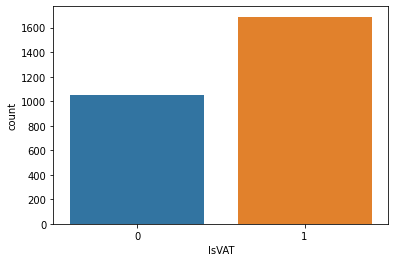

In [ ]:
print(df['IsVAT'].value_counts())

#fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.countplot(x='IsVAT', data=df)
plt.show()

경상남도          211
대구광역시         202
부산광역시         184
충청남도          162
인천광역시         148
             ... 
서울특별시 관악구       2
경기도 연천군         1
서울특별시 종로구       1
경기도 의왕시         1
서울특별시 광진구       1
Name: OrderOrgCode, Length: 73, dtype: int64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52397 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50896 missing from current font.
  font.set_

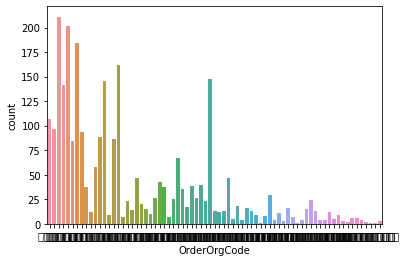

In [ ]:
print(df['OrderOrgCode'].value_counts())
sns.countplot(x='OrderOrgCode', data=df)
plt.show()

9     288
10    286
6     270
5     253
11    244
8     244
7     218
4     217
3     203
1     178
12    173
2     162
Name: BidStartDateTime_m, dtype: int64


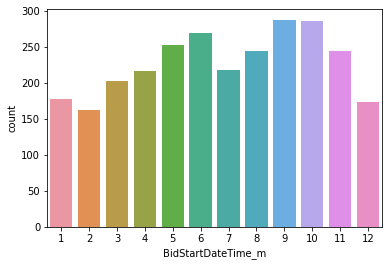

In [ ]:
print(df['BidStartDateTime_m'].value_counts())
sns.countplot(x='BidStartDateTime_m', data=df)
plt.show()

15    112
25    102
12    101
19    101
7     100
28    100
11    100
14     99
4      98
13     97
2      94
6      93
21     93
9      91
26     91
23     90
5      90
20     90
29     89
10     87
27     84
24     84
30     84
8      83
16     79
1      77
3      74
18     73
17     69
22     58
31     53
Name: BidStartDateTime_d, dtype: int64


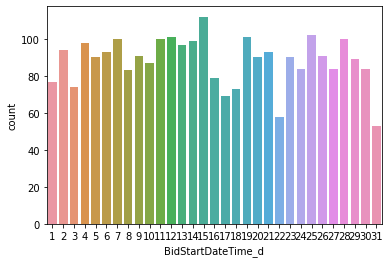

In [ ]:
print(df['BidStartDateTime_d'].value_counts())
sns.countplot(x='BidStartDateTime_d', data=df)
plt.show()

10    296
9     280
6     275
11    245
7     237
5     236
8     232
4     219
3     200
12    177
1     175
2     164
Name: BidEndDateTime_m, dtype: int64


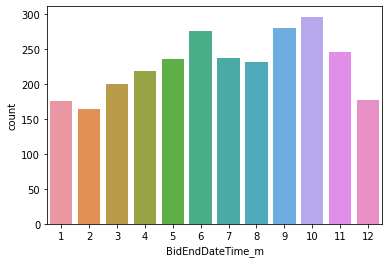

In [ ]:
print(df['BidEndDateTime_m'].value_counts())
sns.countplot(x='BidEndDateTime_m', data=df)
plt.show()

17    114
11    111
2     110
16    109
23    101
8      97
10     97
14     96
25     95
7      93
4      93
5      93
3      92
30     91
21     91
27     90
28     88
13     86
20     85
9      84
12     84
6      84
18     83
24     81
19     79
15     78
29     75
22     73
26     70
1      69
31     44
Name: BidEndDateTime_d, dtype: int64


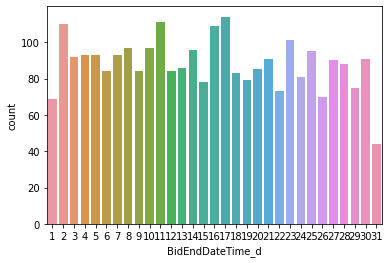

In [ ]:
print(df['BidEndDateTime_d'].value_counts())
sns.countplot(x='BidEndDateTime_d', data=df)
plt.show()

10    299
9     278
6     275
11    245
5     238
7     237
8     231
4     219
3     198
12    177
1     173
2     166
Name: BidOpenDateTime_m, dtype: int64


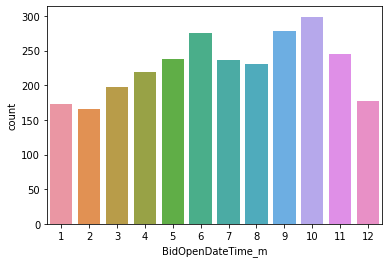

In [ ]:
print(df['BidOpenDateTime_m'].value_counts())
sns.countplot(x='BidOpenDateTime_m', data=df)
plt.show()

17    119
2     113
11    109
10    100
23     97
16     97
14     95
4      95
8      95
7      94
25     94
28     92
3      91
27     91
5      90
18     90
20     89
21     87
13     87
6      86
30     85
12     85
9      85
24     83
15     80
22     78
29     72
19     72
1      68
26     68
31     49
Name: BidOpenDateTime_d, dtype: int64


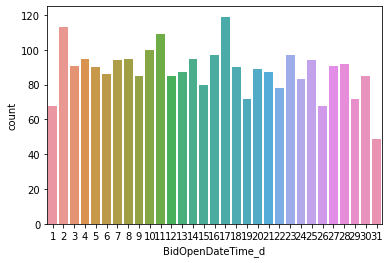

In [ ]:
print(df['BidOpenDateTime_d'].value_counts())
sns.countplot(x='BidOpenDateTime_d', data=df)
plt.show()

10    299
9     280
6     274
11    245
7     237
5     231
8     231
4     224
3     199
12    177
1     173
2     166
Name: BiddingDateTime_m, dtype: int64


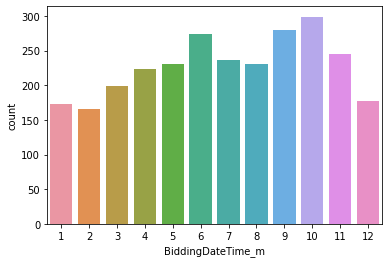

In [ ]:
print(df['BiddingDateTime_m'].value_counts())
sns.countplot(x='BiddingDateTime_m', data=df)
plt.show()

2     118
16    118
11    107
17    106
10    100
14     98
7      97
25     97
5      96
27     94
8      94
20     94
3      93
30     92
21     91
12     90
9      89
23     88
6      86
22     84
29     82
13     82
4      81
24     79
15     78
28     74
26     74
19     74
18     72
1      70
31     38
Name: BiddingDateTime_d, dtype: int64


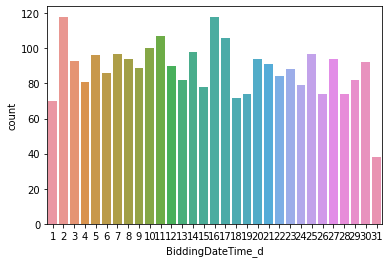

In [ ]:
print(df['BiddingDateTime_d'].value_counts())
sns.countplot(x='BiddingDateTime_d', data=df)
plt.show()

9     1505
10     965
14      84
13      55
12      50
11      36
15      20
16      10
17       5
19       2
18       2
8        1
0        1
Name: BidStartDateTime_HR, dtype: int64


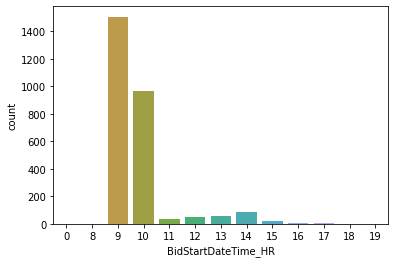

In [ ]:
print(df['BidStartDateTime_HR'].value_counts())
sns.countplot(x='BidStartDateTime_HR', data=df)
plt.show()

10    1042
14     563
12     549
11     294
16     103
15      71
13      45
17      41
18      28
Name: BidEndDateTime_HR, dtype: int64


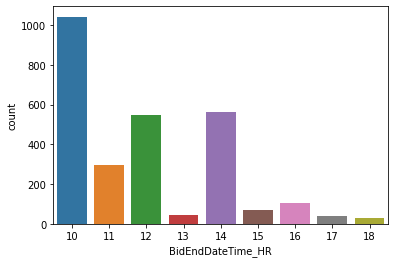

In [ ]:
print(df['BidEndDateTime_HR'].value_counts())
sns.countplot(x='BidEndDateTime_HR', data=df)
plt.show()

11    820
14    682
15    613
13    268
16    196
17     90
10     42
12     11
18     10
19      3
9       1
Name: BidOpenDateTime_HR, dtype: int64


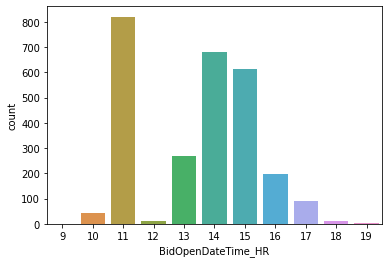

In [ ]:
print(df['BidOpenDateTime_HR'].value_counts())
sns.countplot(x='BidOpenDateTime_HR', data=df)
plt.show()

In [ ]:
plt.rcParams['font.family'] = 'AppleGothic'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

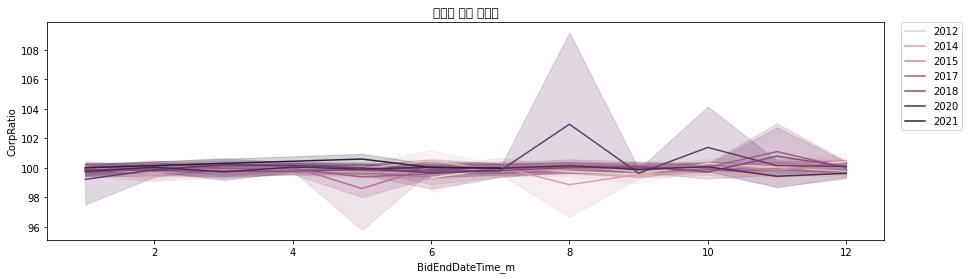

In [ ]:
plt.figure(figsize=(15, 4))
a=sns.lineplot(data=df, x="BidEndDateTime_m", y="CorpRatio", hue="BidTime_y",)
a.set_title('연도별 업체 사정율')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_

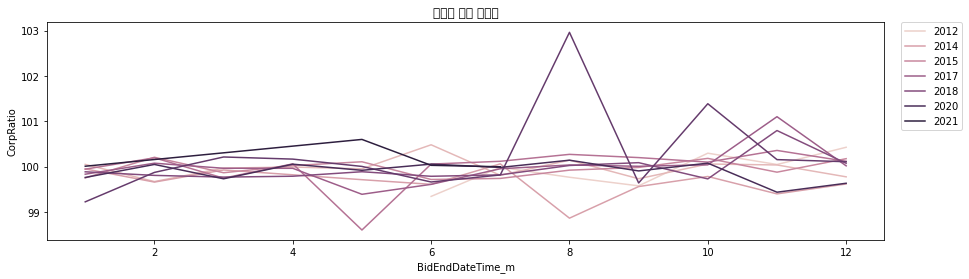

In [ ]:
plt.figure(figsize=(15, 4))
a=sns.lineplot(data=df, x="BidEndDateTime_m", y="CorpRatio", hue="BidTime_y",ci=None)
a.set_title('연도별 업체 사정율')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

# 수치형 시각화

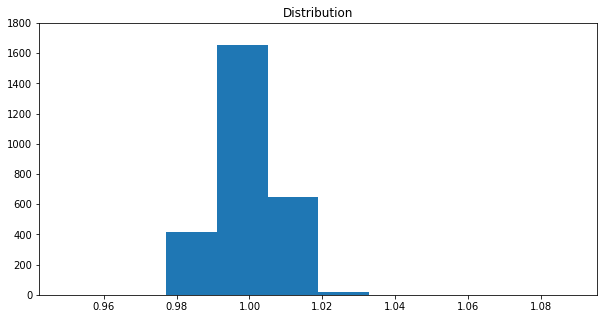

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.hist(df['C/P'], bins=10)
ax.set_ylim(0, 1800)
ax.set_title('Distribution')
plt.show()

In [ ]:
df.columns

Index(['G2BNumTxt', 'SupervisionConstCost', 'BaseCost', 'IsVAT',
       'BidLimitRatio', 'HouseHold', 'GroundArea', 'DrawedCount',
       'OrderOrgCode', 'Avetem', 'Rainfall', 'Avewind', 'Avehum', 'RegistNum',
       'CorpRatio', 'C/P', 'BidTime_y', 'BidStartDateTime_m',
       'BidStartDateTime_d', 'BidEndDateTime_m', 'BidEndDateTime_d',
       'BidOpenDateTime_m', 'BidOpenDateTime_d', 'BiddingDateTime_m',
       'BiddingDateTime_d', 'BidStartDateTime_HR', 'BidEndDateTime_HR',
       'BidOpenDateTime_HR'],
      dtype='object')